# Подготовка данных

Распакуем архив с данными и получим названия всех файлов

In [ ]:
from zipfile import ZipFile

In [ ]:
archive = 'set.zip'
zip_file = ZipFile(archive)
file_names = [text_file.filename for text_file in zip_file.infolist() ]

In [ ]:
import zipfile

In [ ]:
archive = 'set.zip'

with zipfile.ZipFile(archive, 'r') as zip_file:
    zip_file.extractall('set')

Прочитаем каждый текстовый файл

In [ ]:
import pandas as pd

In [ ]:
root_dir = 'set/'

In [ ]:
dataframes = [pd.read_csv(root_dir + file_name, encoding='utf-8', sep=',') for file_name in file_names]

Взглянем на данные

In [ ]:
dataframes[0]

,Time,Parameter,Value
0,00:00,RecordID,152760.0
1,00:00,Age,72.0
2,00:00,Gender,1.0
3,00:00,Height,175.3
4,00:00,ICUType,2.0
...,...,...,...
502,47:00,HR,87.0
503,47:00,NIDiasABP,47.0
504,47:00,NIMAP,68.0
505,47:00,NISysABP,110.0


In [ ]:
dataframes[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       507 non-null    object 
 1   Parameter  507 non-null    object 
 2   Value      507 non-null    float64
dtypes: float64(1), object(2)
memory usage: 12.0+ KB


In [ ]:
d1 = dataframes[0].copy()

In [ ]:
gb = d1.groupby('Time')
split_time_df = [gb.get_group(x) for x in gb.groups]

Запишем данные по времени для каждого пациента


In [ ]:
index = 0
for df1 in split_time_df:
  a = df1.to_dict('list')
  time = a['Time'][0]
  columns = a['Parameter']
  values = a['Value']

  data = pd.DataFrame(np.array([time] + values).reshape(1, -1), columns=['Time'] + columns)
  data['Time'] = pd.to_datetime(data['Time']).dt.time
  data = pd.DataFrame(np.array([index] + [time] + values).reshape(1, -1), columns= ['Index'] + ['Time'] + columns)
  data = data.set_index('Index')
  break

In [ ]:
for d in dataframes:

  for df in split_time_df:
    a = df.to_dict('list')
    time = a['Time'][0]
    columns = a['Parameter']
    values = a['Value']
    index += 1
    data_raw = pd.DataFrame(np.array([index] + [time] + values).reshape(1, -1), columns= ['Index'] + ['Time'] + columns)
    data_raw.set_index('Index')
    data_pred = data.copy()
    try:
      data_raw['Time'] = pd.to_datetime(data_raw['Time']).dt.time
      data = pd.concat([data, data_raw])
    except:
      data = data_pred.copy()

Сохраним данные

In [ ]:
data.to_csv('1_1_data.csv')

# Исследование данных

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Загрузим обработанные в прошлом модуле данные

In [7]:
df = pd.read_csv('My_Dataset_для_С2.txt', encoding='utf-8', sep=',')

In [3]:
df.head()

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanSysABP,MeanTemp,MeanTroponinI,MeanTropI,MeanTroponinT,MeanTropT,MeanUrine,MeanWBC,MeanWeight,Unnamed: 44
0,66269.5,27.0,0.0,-0.50,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,37.357143,NaN,NaN,NaN,NaN,171.052632,10.300000,-1.000000,NaN
1,66270.0,38.0,0.5,87.65,1.0,NaN,NaN,NaN,NaN,NaN,...,113.411765,36.939130,NaN,NaN,NaN,NaN,151.560976,11.266667,80.670588,NaN
2,66270.5,22.0,0.0,-0.50,1.5,2.5,116.0,83.0,199.5,2.9,...,125.687500,37.800000,NaN,NaN,NaN,NaN,124.951220,4.700000,56.700000,NaN
3,66271.5,34.0,0.5,90.15,1.5,4.4,105.0,12.0,15.0,0.2,...,NaN,36.223077,NaN,NaN,NaN,NaN,545.833333,9.400000,84.600000,NaN
4,66272.5,44.0,0.0,-0.50,1.5,3.3,NaN,NaN,NaN,NaN,...,NaN,36.880000,NaN,NaN,NaN,NaN,62.131579,4.300000,-1.000000,NaN


Удалим повторяющиеся строки, если таковые имеются

In [316]:
df = df.drop_duplicates()

## Первичный анализ

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RecordID         8000 non-null   float64
 1   Age              8000 non-null   float64
 2   Gender           8000 non-null   float64
 3   Height           8000 non-null   float64
 4   ICUType          8000 non-null   float64
 5   MeanWeight       8000 non-null   float64
 6   MeanBUN          7880 non-null   float64
 7   MeanCreatinine   7880 non-null   float64
 8   MeanGCS          7871 non-null   float64
 9   MeanGlucose      7799 non-null   float64
 10  MeanHCO3         7863 non-null   float64
 11  MeanHCT          7876 non-null   float64
 12  MeanHR           7872 non-null   float64
 13  MeanK            7831 non-null   float64
 14  MeanMg           7813 non-null   float64
 15  MeanNIDiasABP    7000 non-null   float64
 16  MeanNIMAP        6996 non-null   float64
 17  MeanNISysABP  

Заметим, что в данных имеется столбцы 'Unnamed: 44' и 'MeanTropT        ', которые полностью состоит из пропусков и датасет 'MeanTropI', в котором всего одно значение, можно от них избавиться

In [318]:
df = df.drop(['Unnamed: 44', 'MeanTropI', 'MeanTropT'], axis=1)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RecordID         8000 non-null   float64
 1   Age              8000 non-null   float64
 2   Gender           8000 non-null   float64
 3   Height           8000 non-null   float64
 4   ICUType          8000 non-null   float64
 5   MeanAlbumin      3246 non-null   float64
 6   MeanALP          3379 non-null   float64
 7   MeanALT          3456 non-null   float64
 8   MeanAST          3461 non-null   float64
 9   MeanBilirubin    3446 non-null   float64
 10  MeanBUN          7880 non-null   float64
 11  MeanCholesterol  648 non-null    float64
 12  MeanCreatinine   7880 non-null   float64
 13  MeanDiasABP      5610 non-null   float64
 14  MeanFiO2         5419 non-null   float64
 15  MeanGCS          7871 non-null   float64
 16  MeanGlucose      7799 non-null   float64
 17  MeanHCO3      

Помимио этого, в данных имеется множество пропусков, которые в дальнейшем необходимо заполнить

Построим описательную статистику датасета для числовых признаков, где отражены общее количество записей в колонке, минимальное и максимальное значения, среднее значение, медиана (50%) и верхний и нижний квартили (25%, 75%).

In [320]:
df.describe()

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanPlatelets,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinI,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,3246.000000,3379.000000,3456.000000,3461.000000,3446.000000,...,7870.000000,2228.000000,3545.000000,5610.000000,7871.000000,385.000000,1805.000000,7787.000000,7861.000000,8000.000000
mean,71336.304188,32.214875,0.280687,44.059113,1.391875,2.951625,105.159711,161.229856,228.553798,1.885847,...,204.157717,19.650854,96.558512,119.096129,36.956918,7.600771,1.017012,134.054444,12.797013,76.614612
std,2928.526287,8.676314,0.249131,43.102086,0.506548,0.633583,105.184140,584.978187,821.954211,4.275192,...,103.979725,3.899509,3.372498,19.981561,0.709756,10.302880,2.557133,110.105727,21.442040,32.504830
min,66269.500000,7.500000,-0.500000,-0.500000,0.500000,1.100000,12.000000,3.000000,6.000000,0.000000,...,12.166667,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.075000,-1.000000
25%,68796.375000,26.500000,0.000000,-0.500000,1.000000,2.500000,57.500000,18.000000,25.000000,0.400000,...,136.000000,16.901056,96.000000,107.020303,36.600000,0.800000,0.040000,74.355163,8.750000,63.400000
50%,71337.000000,33.500000,0.500000,76.200000,1.500000,2.933333,78.000000,31.000000,46.000000,0.700000,...,186.500000,19.018387,97.250000,117.116201,36.970000,2.200000,0.130000,112.500000,11.500000,78.000000
75%,73868.750000,39.000000,0.500000,85.100000,2.000000,3.400000,111.000000,71.500000,104.500000,1.400000,...,248.500000,21.935577,98.000000,130.528846,37.360000,11.300000,0.652500,163.080952,14.950000,92.829021
max,76432.000000,45.000000,0.500000,231.150000,2.000000,5.300000,1472.333333,10728.888889,15680.000000,55.500000,...,1483.666667,39.655172,100.000000,199.000000,39.748980,49.200000,24.040000,3082.380952,1791.542857,472.000000


Видим, что средние по признакам значительно различаются, а также слишком разный диапозон значений - в дальнейшем придется нормализировать данные.

Рассмотрим признаки как случайные величины и выведем их гистограммы значений.

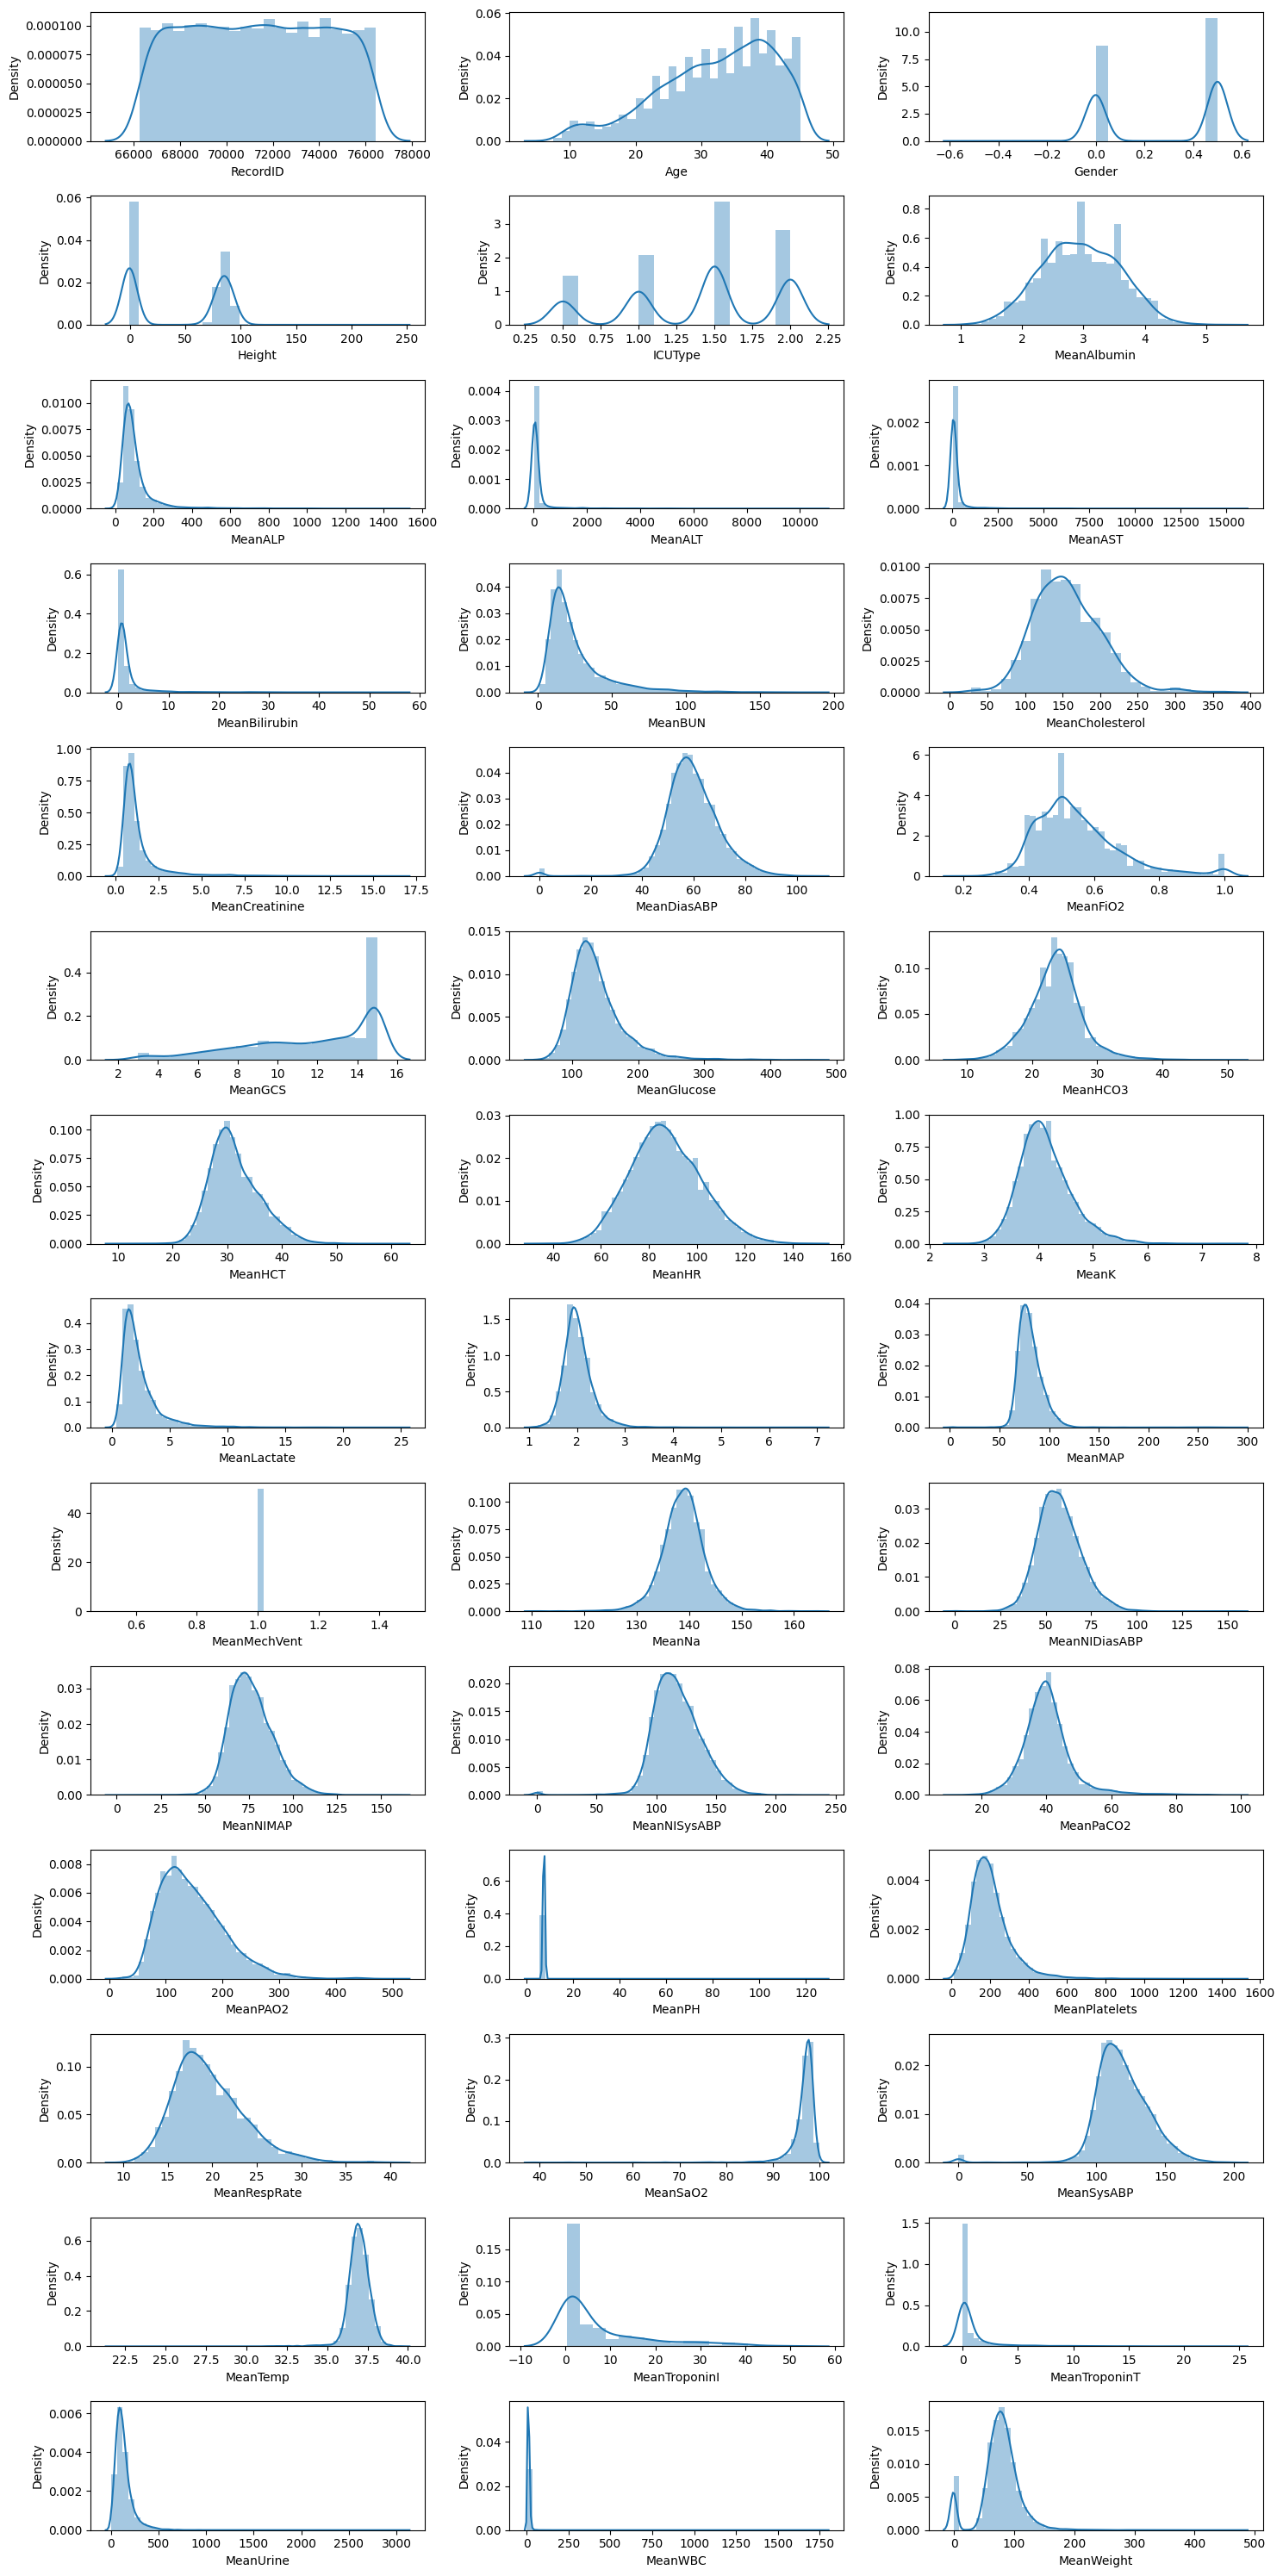

In [325]:
plt.figure(figsize=(15, 30))
for i in range(len(df.columns)):
    plt.subplot(14, 3, i + 1)
    sns.distplot(df[df.columns[i]].dropna())
    plt.tight_layout()
plt.show()

Признак RecordId имеет явное равномерноераспределение. В большей части остальных данных наблюдается тенденция приверженности нормальному распределению.

Судя по графикам, в данных присутствует дизбаланс.

Посмотрим процент уникальных элементов по каждой колонке.

In [30]:
percent_unique = df.nunique() / len(df) * 100
percent_unique

RecordID           100.0000
Age                  0.9500
Gender               0.0375
Height               1.0125
ICUType              0.0500
MeanWeight          34.3750
MeanBUN             14.3250
MeanCreatinine      12.1000
MeanGCS             21.7500
MeanGlucose         20.9750
MeanHCO3             5.9625
MeanHCT             38.0500
MeanHR              90.7250
MeanK                8.6125
MeanMg               6.0375
MeanNIDiasABP       58.4750
MeanNIMAP           77.5750
MeanNISysABP        63.9500
MeanNa               6.7125
MeanPlatelets       35.8500
MeanRespRate        24.6625
MeanTemp            48.5000
MeanUrine           88.3375
MeanWBC             29.7875
MeanDiasABP         62.1875
MeanFiO2            14.0125
MeanMAP             63.0750
MeanMechVent         0.0125
MeanPaCO2           20.4875
MeanPaO2            43.5875
MeanSaO2             4.6000
MeanSysABP          64.6250
MeanpH              21.6125
MeanALP             10.7375
MeanALT             11.1750
MeanAST             

Видим, что столбец Id абсолютно уникален для каждого объекта, он неинформативен - в нем содержатся идентификаторы пациентов. Избавимся от него.

In [327]:
df.drop(['RecordID'], axis=1, inplace=True)

Также видим, что столбец 'MeanMechVent' имеет почти 0 процентов уникальности. Посмотрим, какие значения он содержит.

In [31]:
df['MeanMechVent'].unique()

array([nan,  1.])

Как видим, этот признак либо пропущен, либо имеет значение 1, обратим внимание, что это не бинарный признак, он имеет лишь одно значение, поэтому он также неинформативен и от него можно избавиться.

In [337]:
df.drop(['MeanMechVent'], axis=1, inplace=True)

Посмотрим количество пропущенных значений в каждом из столбцов.

In [338]:
df.isna().sum()

,0
Age,0
Gender,0
Height,0
ICUType,0
MeanAlbumin,4754
MeanALP,4621
MeanALT,4544
MeanAST,4539
MeanBilirubin,4554
MeanBUN,120


Попробуем удалить из датасета строки с пропущенными значениями и взглянем, сколько данных останется.

In [339]:
df.dropna().shape[0]

0

Как видим, после удаления строк с пропущенными значениями совсем не остается данных. Такое действие недопустимо, поэтому предобработаем их другими способами.

## Заполнение пропусков

Напишем метод для получения уникальных значений для каждого из переданных столбцов, при этом, если уникальных значений больше, чем max_print, то не печатаем их, чтобы выявить колонки которые имеют малое количество уникальных значений и применить к ним специальный метод для замены пропусков (например, в некоторых случаях пропуски в таких данных целесообразней заменить модой или медианой).

In [32]:
def get_unique_values(df, max_print, columns=[]):
    unique_values = {}
    for col in columns:
        if len(df[col].dropna().unique()) <= max_print:
            unique_values[col] = df[col].dropna().unique()
    return unique_values

In [33]:
get_unique_values(df, 60, columns=df.columns)

{'Gender': array([ 0.,  1., -1.]),
 'ICUType': array([4., 2., 3., 1.]),
 'MeanMechVent': array([1.])}

Данные колонки имеют небольшой диапозон значений, однако они не содержат пропусков.

Остальные столбцы датасета содержат большое количество уникальных значений, поэтому пропуски в них целесообразней заменить средним значением, чтобы как можно лучше сохранить исходное распределение.

Напишем функцию, которая ищет среднее значение в колонке и при этом пропускает все неопределенные (NaN) значения.

In [8]:
def find_mean(df, columns=[], type_vals='float64'):
    means = []
    for col in columns:
        means.append(np.mean(df[col].dropna().astype(type_vals)))
    return means

Напишем функцию, которая заполняет пропуски средним значением.

In [9]:
def fill_missing_values(df, columns=[], type_vals='float64'):
    fill_values = find_mean(df, columns, type_vals)
    for col, fill_value in zip(columns, fill_values):
        df[col].fillna(fill_value, inplace=True)
    return df

Заполним пропуски

In [10]:
df = fill_missing_values(df, columns=df.columns, type_vals='float64')

In [346]:
df.head()

,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,MeanBUN,...,MeanPlatelets,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinI,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight
0,27.0,0.0,-0.50,2.0,2.951625,105.159711,161.229856,228.553798,1.885847,10.500000,...,203.000000,17.428571,96.558512,119.096129,37.357143,7.600771,1.017012,171.052632,10.300000,-1.000000
1,38.0,0.5,87.65,1.0,2.951625,105.159711,161.229856,228.553798,1.885847,18.333333,...,178.600000,19.650854,96.833333,113.411765,36.939130,7.600771,1.017012,151.560976,11.266667,80.670588
2,22.0,0.0,-0.50,1.5,2.500000,116.000000,83.000000,199.500000,2.900000,4.666667,...,89.666667,19.650854,95.000000,125.687500,37.800000,7.600771,1.017012,124.951220,4.700000,56.700000
3,34.0,0.5,90.15,1.5,4.400000,105.000000,12.000000,15.000000,0.200000,17.666667,...,330.000000,15.457627,96.558512,119.096129,36.223077,7.600771,1.017012,545.833333,9.400000,84.600000
4,44.0,0.0,-0.50,1.5,3.300000,105.159711,161.229856,228.553798,1.885847,35.000000,...,103.000000,19.166667,96.558512,119.096129,36.880000,7.600771,1.017012,62.131579,4.300000,-1.000000


Убедимся, что заполнение пропусков не изменило исходного распределения данных

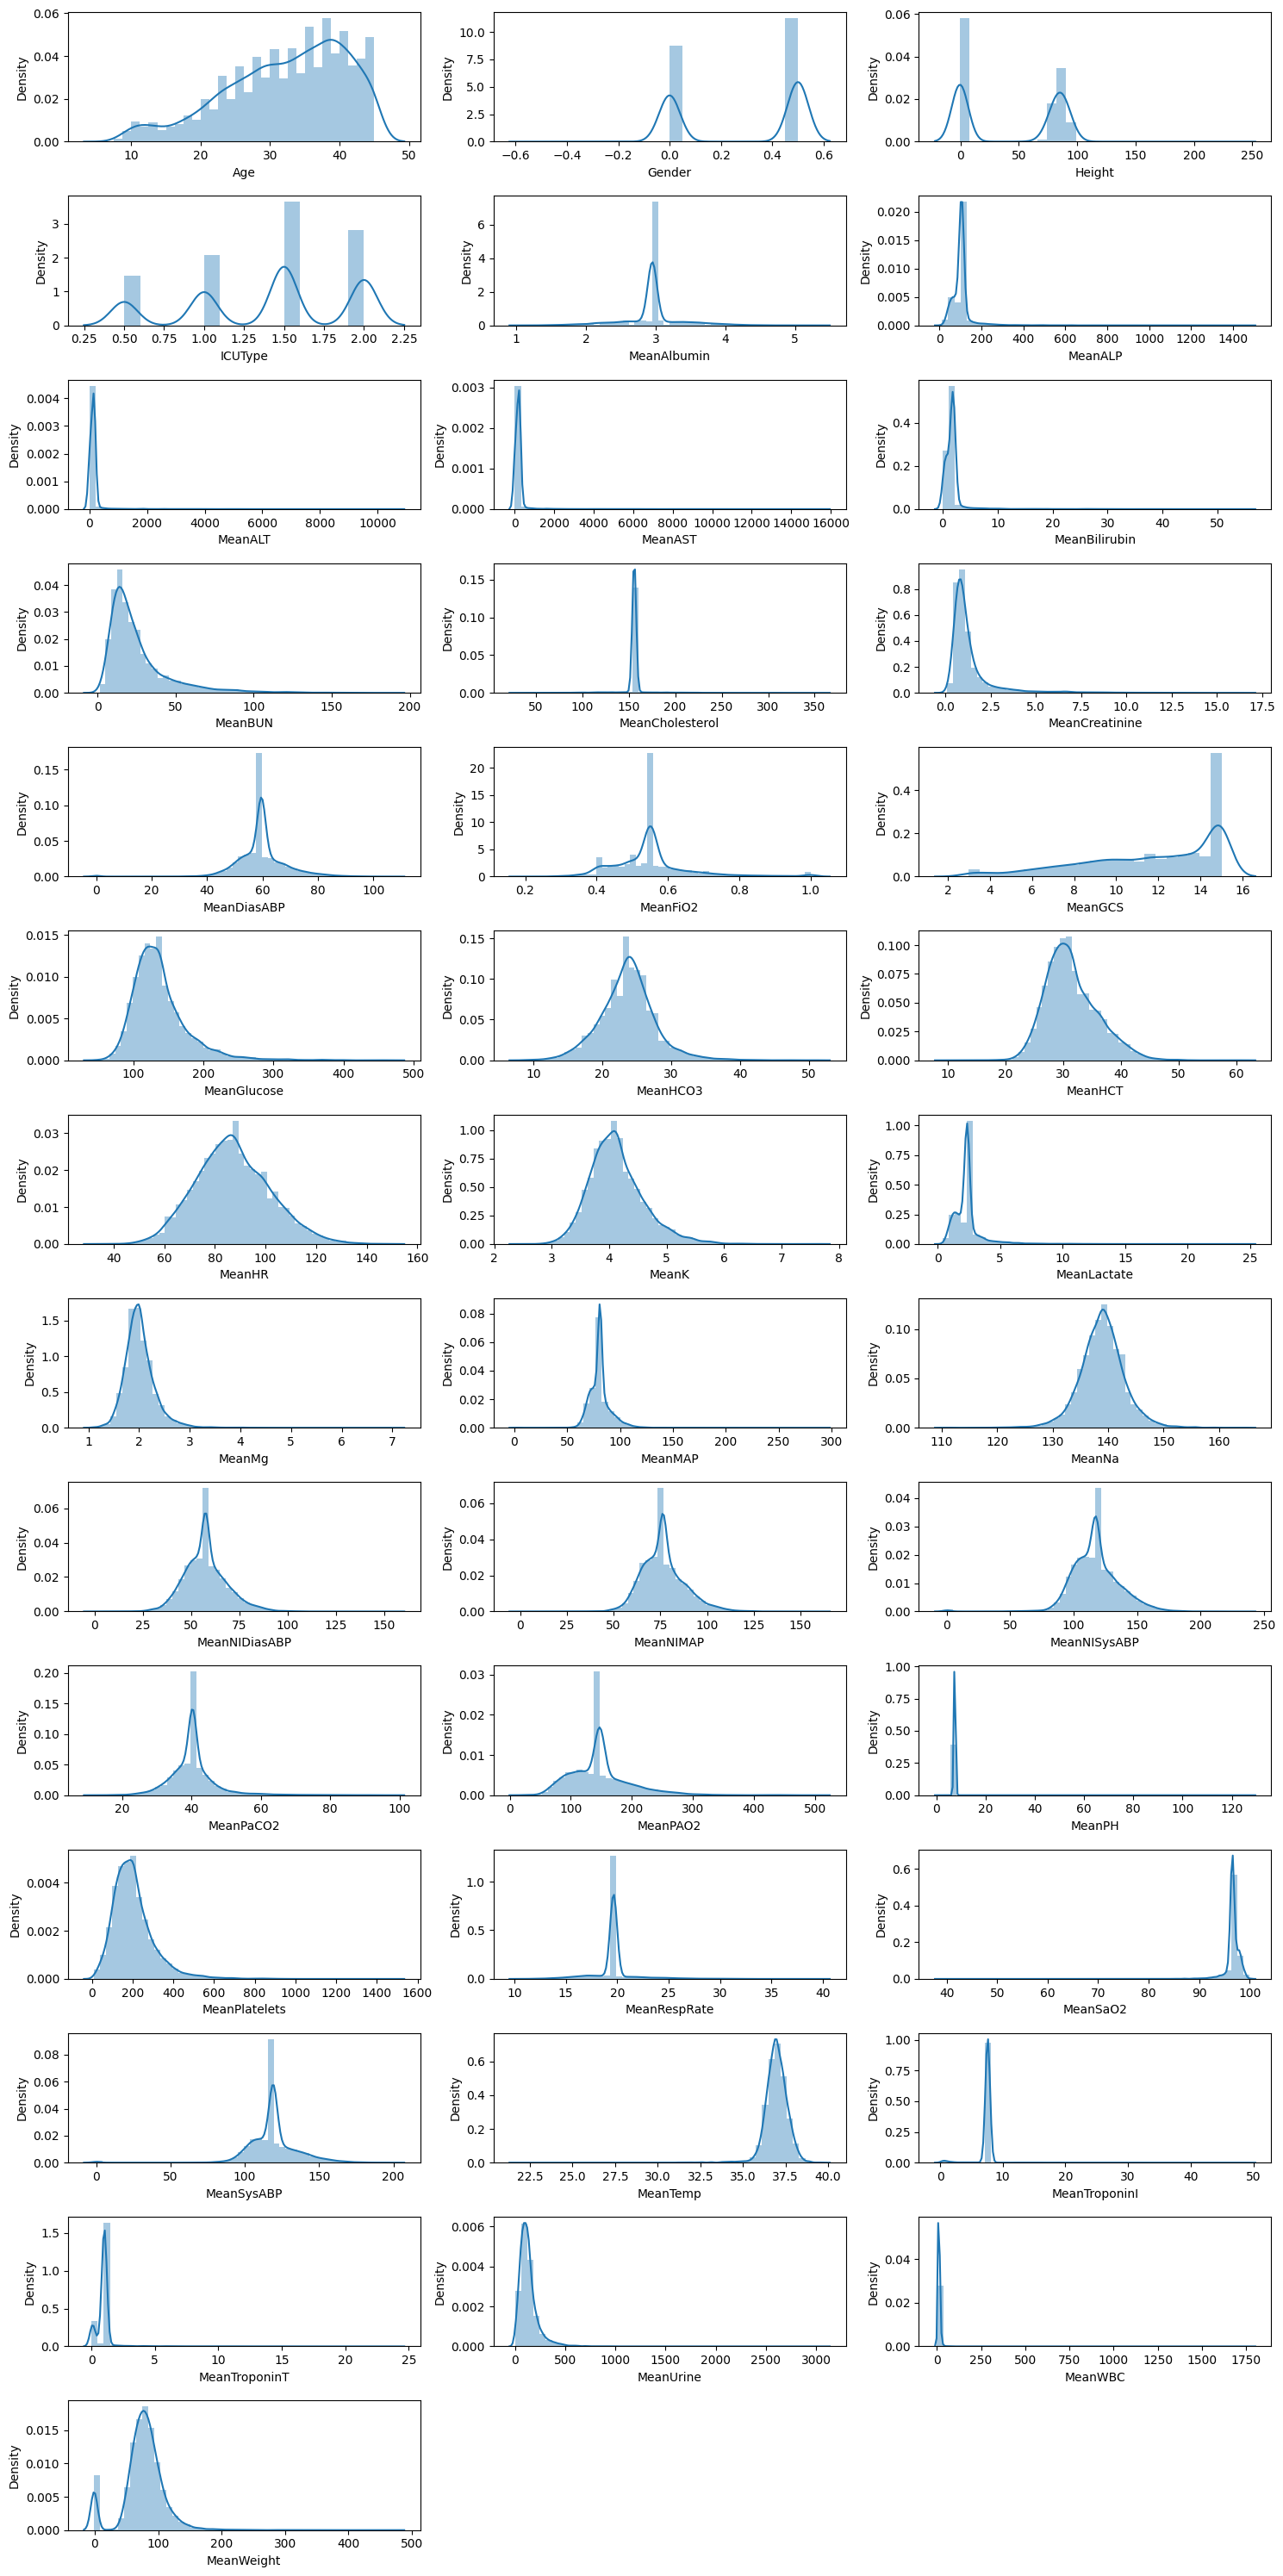

In [347]:
plt.figure(figsize=(15, 30))
for i in range(len(df.columns)):
    plt.subplot(14, 3, i + 1)
    sns.distplot(df[df.columns[i]].dropna())
    plt.tight_layout()
plt.show()

Действительно, формы распределений сохранились.

Посмотрим на корелляцию признаков между собой после заполнения пропусков.

In [348]:
df.corr()

,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,MeanBUN,...,MeanPlatelets,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinI,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight
Age,1.000000,-0.093276,0.039784,-0.181655,-0.041350,0.007197,-0.082955,-0.062952,-0.070275,0.233827,...,-0.028308,0.053477,0.034109,0.004307,-0.178274,3.092162e-03,-1.404285e-02,-0.264103,-0.007124,-0.115494
Gender,-0.093276,1.000000,0.117397,-0.038095,0.050713,-0.030907,-0.011567,-0.007634,0.047531,0.062285,...,-0.098176,-0.015739,-0.020530,-0.002424,0.046516,2.714375e-02,3.312722e-02,0.104714,-0.019493,0.219423
Height,0.039784,0.117397,1.000000,-0.285955,-0.028539,-0.065824,0.008429,0.028546,-0.009525,-0.043995,...,-0.141091,-0.011769,0.053329,-0.116811,0.066189,1.879851e-02,9.605893e-02,-0.039909,0.022297,0.285243
ICUType,-0.181655,-0.038095,-0.285955,1.000000,-0.088870,0.045222,0.016139,-0.005425,0.063077,-0.078885,...,0.038961,-0.044169,-0.023662,0.202214,0.071049,-6.453382e-02,-1.980987e-01,-0.051516,0.003877,-0.058552
MeanAlbumin,-0.041350,0.050713,-0.028539,-0.088870,1.000000,-0.139502,-0.013531,-0.034425,-0.081212,-0.080029,...,0.022930,-0.027704,0.018415,0.107604,-0.001274,2.423526e-02,6.431767e-02,0.127343,-0.041571,-0.015599
MeanALP,0.007197,-0.030907,-0.065824,0.045222,-0.139502,1.000000,0.075259,0.101447,0.219337,0.109752,...,0.079246,-0.007031,-0.014651,-0.024740,-0.062279,-2.811901e-02,-3.363178e-02,-0.036619,0.028630,-0.052875
MeanALT,-0.082955,-0.011567,0.008429,0.016139,-0.013531,0.075259,1.000000,0.854782,0.077752,0.020683,...,-0.077103,-0.001862,-0.036159,-0.018967,-0.010229,-2.214688e-03,2.495063e-03,-0.043943,-0.000856,0.000764
MeanAST,-0.062952,-0.007634,0.028546,-0.005425,-0.034425,0.101447,0.854782,1.000000,0.096141,0.030121,...,-0.083244,-0.003085,-0.045065,-0.032186,-0.004732,-1.488661e-03,3.463534e-02,-0.058828,0.002263,0.009965
MeanBilirubin,-0.070275,0.047531,-0.009525,0.063077,-0.081212,0.219337,0.077752,0.096141,1.000000,0.139694,...,-0.143230,-0.001410,0.008146,-0.041705,-0.077352,-9.427590e-03,-1.544327e-02,-0.069523,0.016225,0.033104
MeanBUN,0.233827,0.062285,-0.043995,-0.078885,-0.080029,0.109752,0.020683,0.030121,0.139694,1.000000,...,-0.035207,0.007977,-0.053358,-0.024816,-0.180470,-4.018106e-04,-1.760955e-02,-0.193433,0.016018,0.059847


<Axes: >

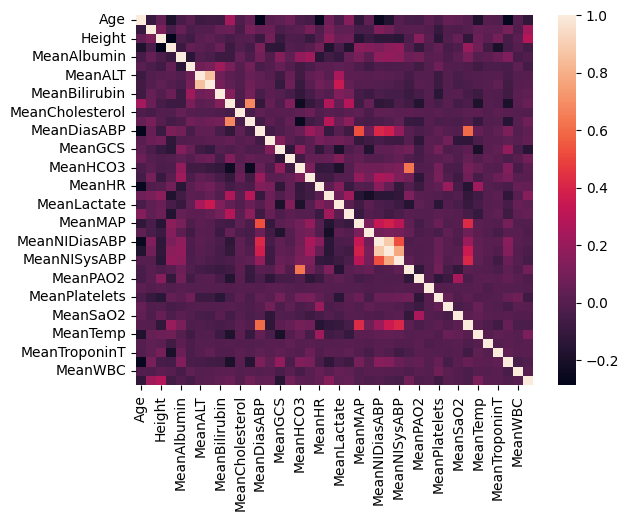

In [349]:
sns.heatmap(df.corr())

По карте корреляций видно, что в данных присутствуют пары признаков с корреляцией выше среднего.

Напишим функцию для полной предобработки датасета.

In [11]:
def full_preprocess(df, useless_cols=['MeanTropI', 'MeanTropT', 'MeanMechVent']):
    # # Загрузка датасета
    # df = pd.read_csv(filename, encoding='utf-8', sep=',')
    # Удаление дубликатов
    df = df.drop_duplicates()
    # Удаление неинформативных столбцов
    df.drop(useless_cols, axis=1, inplace=True)
    # Заполнение пропусков
    df = fill_missing_values(df, columns=df.columns, type_vals='float64')

    return df

In [12]:
df_new = full_preprocess()

In [13]:
df_new.head()

,RecordID,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,...,MeanPlatelets,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinI,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight
0,66269.5,27.0,0.0,-0.50,2.0,2.951625,105.159711,161.229856,228.553798,1.885847,...,203.000000,17.428571,96.558512,119.096129,37.357143,7.600771,1.017012,171.052632,10.300000,-1.000000
1,66270.0,38.0,0.5,87.65,1.0,2.951625,105.159711,161.229856,228.553798,1.885847,...,178.600000,19.650854,96.833333,113.411765,36.939130,7.600771,1.017012,151.560976,11.266667,80.670588
2,66270.5,22.0,0.0,-0.50,1.5,2.500000,116.000000,83.000000,199.500000,2.900000,...,89.666667,19.650854,95.000000,125.687500,37.800000,7.600771,1.017012,124.951220,4.700000,56.700000
3,66271.5,34.0,0.5,90.15,1.5,4.400000,105.000000,12.000000,15.000000,0.200000,...,330.000000,15.457627,96.558512,119.096129,36.223077,7.600771,1.017012,545.833333,9.400000,84.600000
4,66272.5,44.0,0.0,-0.50,1.5,3.300000,105.159711,161.229856,228.553798,1.885847,...,103.000000,19.166667,96.558512,119.096129,36.880000,7.600771,1.017012,62.131579,4.300000,-1.000000


Убедимся, что в датасете не осталось пропусков.

In [355]:
df_new.isna().sum().sum()

0

Сохраним датасет

In [356]:
new_filename = 'data_pred.csv'
df_new.to_csv(new_filename, index=False)

## Визуализация данных

Посмотрим на распределение признаков - построим boxplot - ящик с усами.

Функция draw_boxplot будет рисовать один ящик с усами по заданным данным.

In [425]:
def draw_boxplot(data, axes=None, **kwargs):
    sns.boxplot(x=data, ax=axes, **kwargs)

Напишем метод draw_subplots, который будет визуализировать графики для нескольких колонок.

In [424]:
def draw_subplots(df, columns=[], type_graph=None, ncols=3, figsize=(20, 6),
                  labels=None, titles=None, **kwargs):
    nrows = (len(columns) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=[figsize[0], figsize[1]*nrows])
    axes = np.array(axes)
    axes = axes.reshape((-1,))
    if type_graph is None:
        type_graph = draw_boxplot
    if labels is None:
        def_label = [i for i in range(len(columns))]
        labels = [def_label, def_label]
    if titles is None:
        titles = columns
    for i, col in enumerate(columns):
        axes[i].set(xlabel=labels[0][i], ylabel=labels[1][i], title=titles[i])
        type_graph(df[col], axes[i], **kwargs)

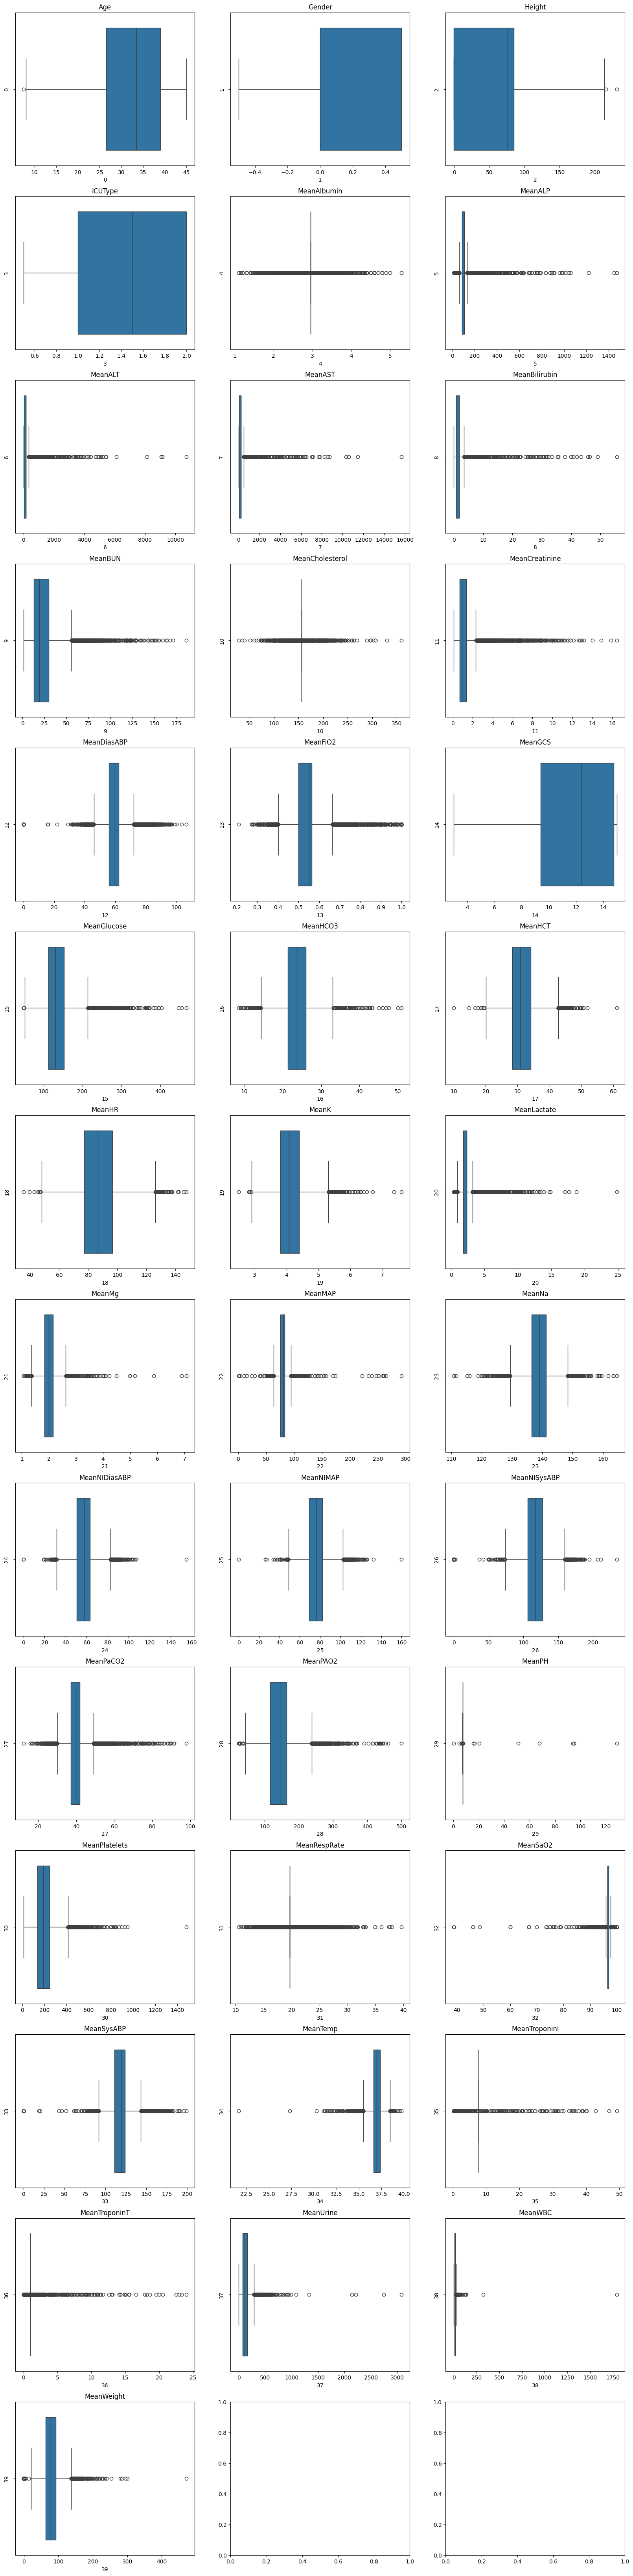

In [361]:
draw_subplots(df, df.columns)

Заметим, что в большинстве колонок содержатся выбросы (по графикам видно, что значения выходят за $3σ$).

## Удаление выбросов

In [388]:
from scipy import stats

Попробуем несколько методов удаления выбросов и выберем самый подходящий из них.

**Фильтр Хампеля**. В своей основе он использует скользящее среднее с заданным окном. Для каждой итерации или окна фильтр вычисляет медиану и стандартное отклонение. Если значение медианы окна скользящего среднего больше чем х стандартных отклонений, то это — выброс.

In [387]:
# Фильтр Хампеля
def hampel(df_):
    """ Поиск выбросов, превышающих значение в три медианы """
    outlier_df = df_.copy()
    for col in outlier_df.columns:  # для всех столбцов
        difference = np.abs(outlier_df[col].median()-outlier_df[col]) # разность медианы и каждого значения
        median_abs_deviation = difference.median()  # медианное абсолютное отклонение
        threshold = 3 * median_abs_deviation  # 3 медианных отклонения
        outlier_idx = difference > threshold  # метка True или False
        outlier_df[col][outlier_idx] = np.nan

    outlier_df.dropna(inplace=True)  # Удалить выбросы из данных
    return(outlier_df)

**IQR**. Суть метода в том, что сначала вычисляются первый квартиль (Q1) и третий квартиль (Q3), затем IQR определяется как разница между ними. Значения за пределами этого диапазона, умноженного на коэффициент (часто 1.5) считаются выбросами.

In [407]:
# Межквартильный диапазон
def iqr(df_):
    outlier_df = df_.copy()
    threshold = 1.5
    for col in df_.columns:
        # вычисляем границу
        Q1 = df_[col].quantile(0.25)
        Q3 = df_[col].quantile(0.75)
        IQR = Q3 - Q1
        # обнаруживаем выбросы
        outliers = (df_[col] < Q1 - threshold * IQR) | (df_[col] > Q3 + threshold * IQR)
        outlier_df[col][outliers] = np.nan
    outlier_df.dropna(inplace=True)  # Удалить выбросы из данных
    return outlier_df

**Удаление выбросов через правило трёх сигм**. Предполагается, что 99,7% значений распределены в интервале трёх стандартных отклонений (сигм) от среднего. Таким образом, выбросами считаются значения, отклоняющиеся от среднего больше, чем на три сигмы.

In [409]:
def three_sigmas(df_):
  return df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # в этой функции мы считаем объект выбросом, если ВСЕ его значения выходят за 3 сигмы

In [467]:
hampel_df = hampel(df)

iqr_df = iqr(df)

three_sigmas_df = three_sigmas(df)

print("Количество строк в оригинальных данных:")
print(len(df))
print("\nКоличество строк после удаления выбросов Hampel:")
print(len(hampel_df))
print("\nКоличество строк после удаления выбросов IQR:")
print(len(iqr_df))
print("\nКоличество строк после удаления выбросов 3σ:")
print(len(three_sigmas_df))

Количество строк в оригинальных данных:
8000

Количество строк после удаления выбросов Hampel:
16

Количество строк после удаления выбросов IQR:
594

Количество строк после удаления выбросов 3σ:
5442


Как видим, фильтр Xампеля и IQR (даже при большем значении порога) удаляют большую часть данных, при их использовании огромная часть данных теряется, поэтому будем использовать удаление выбросов через правило трёх сигм.

In [420]:
def draw_without_outliers(data, axes=None, **kwargs):
    data.plot(kind='line', figsize=(12, 5))
    plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0.)

Посмотрим, как выглядят данные после применения каждого из методов.

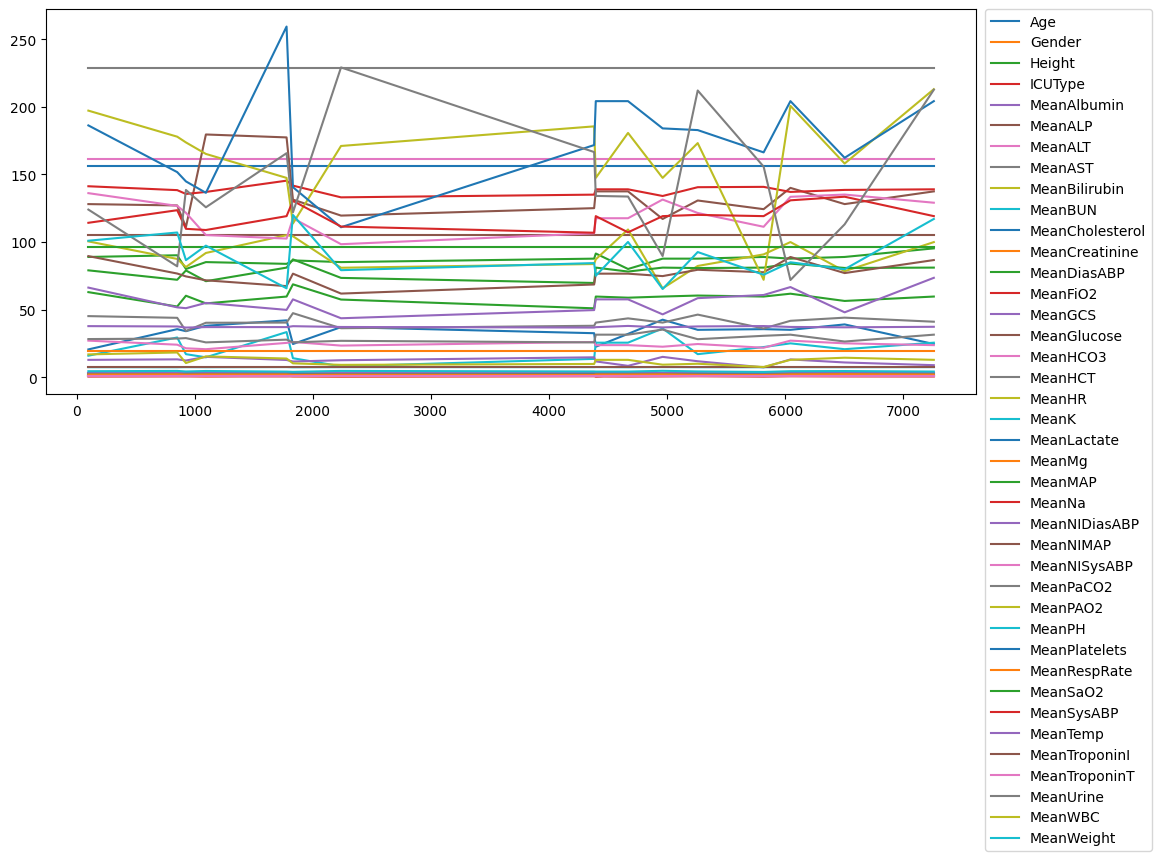

In [421]:
# Метод Хампеля
draw_without_outliers(hampel_df)

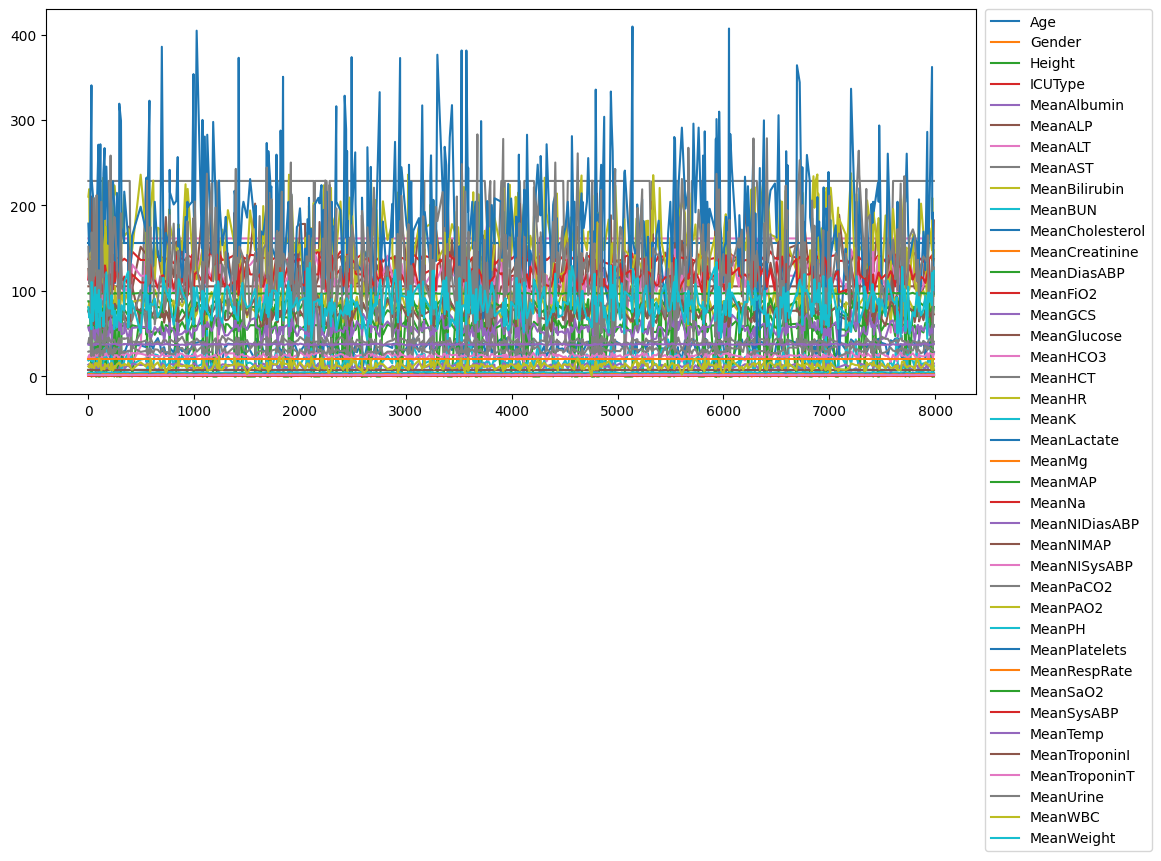

In [422]:
# IQR
draw_without_outliers(iqr_df)

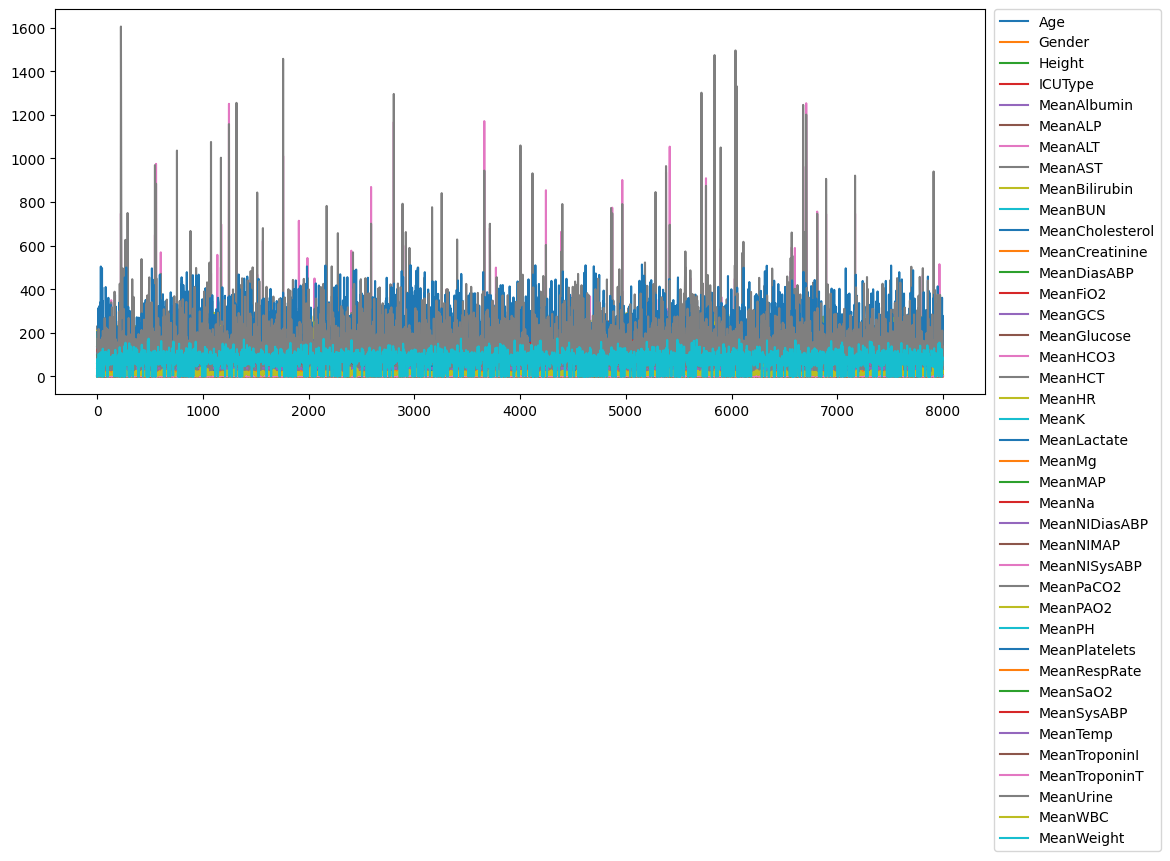

In [423]:
# Метод трех сигм
draw_without_outliers(three_sigmas_df)

И посмотрим как изменился график ящик с усами после применения метода удаления выбросов с помощью трех сигм.

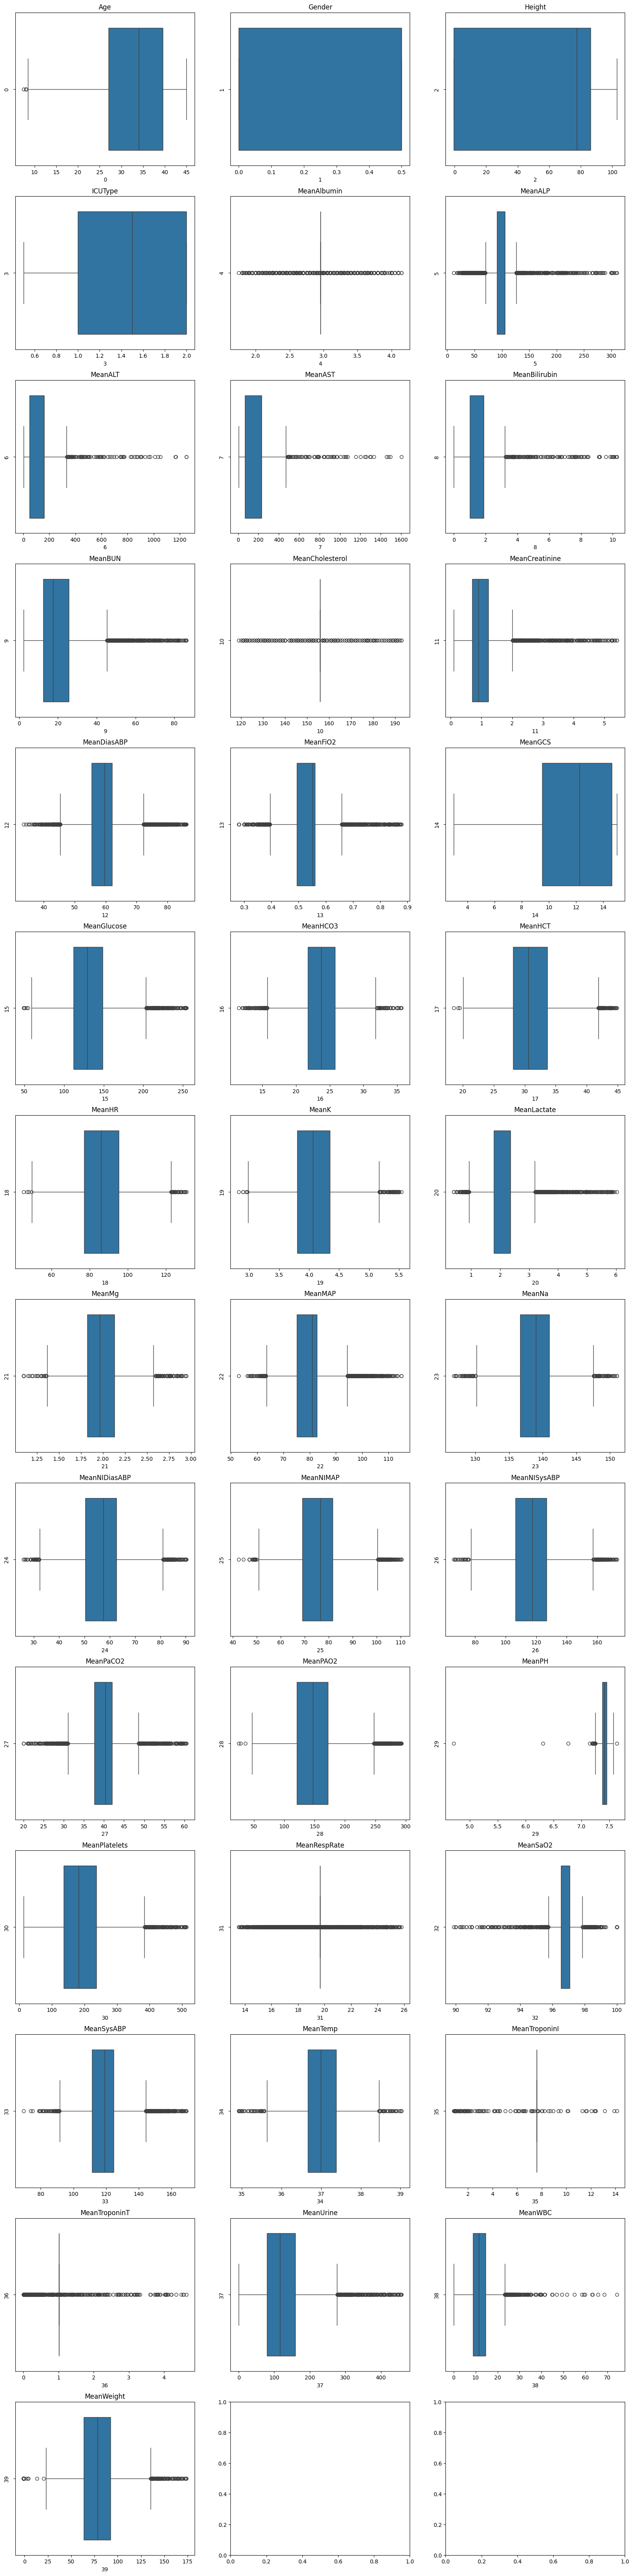

In [426]:
draw_subplots(three_sigmas_df, three_sigmas_df.columns)

Как можем видеть по графику, выбросов стало значительно меньше. Таким образом, мы значительно очистили данные, не потеряв большую их часть.

Проведем попарную визуализацию некоторых признаков с возрастом пациентов

Посмотрим, как некоторые из признаков

In [427]:
pairs = [['Age', 'MeanK'],
         ['Age', 'MeanMg'],
         ['Age', 'MeanTemp']]
titles = [p[0] + ' - ' + p[1] for p in pairs]

In [429]:
def draw_pairplot(data, axes=None, **kwargs):
    sns.pairplot(data, **kwargs)

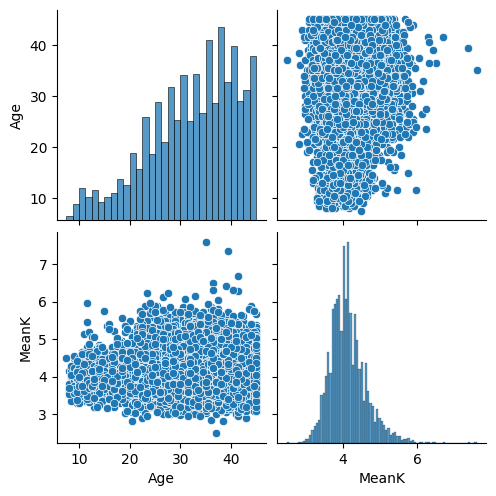

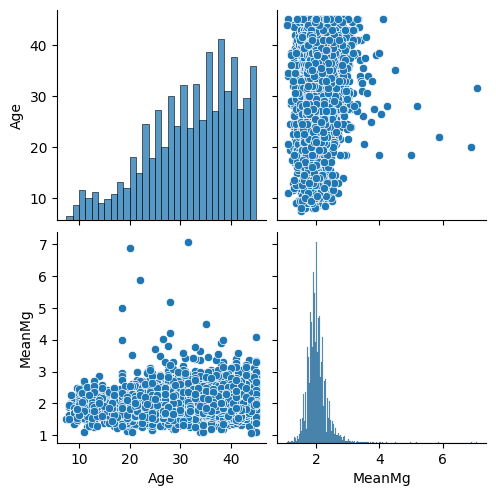

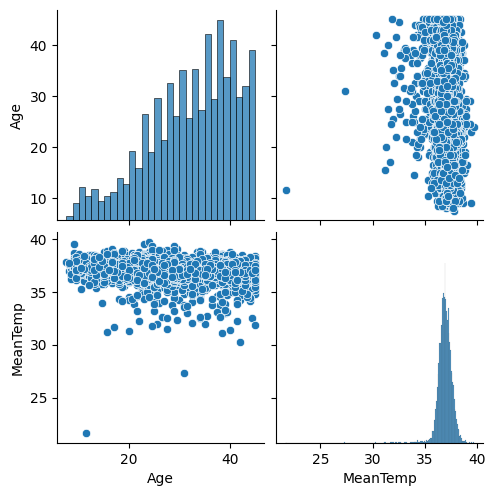

In [430]:
for pair in pairs:
    draw_pairplot(df[pair])

По графикам сложно определить однозначную зависимость между парами исследуемых признаков.

## Обнаружение и удалени аномалей

Удалим аномалии, используя кластерный метод DBSCAN.

Для этого сначала построим график, чтобы найти оптимальное значение epsilon.

In [433]:
from sklearn.cluster import DBSCAN

In [435]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=4).fit(df)
distances, indices = nbrs.kneighbors(df)
distances

array([[  0.        ,  39.66988824,  42.84158124,  45.59644108],
       [  0.        ,  29.73732941,  33.08442139,  34.73225825],
       [  0.        ,  90.32640154,  97.40361079,  97.59298996],
       ...,
       [  0.        ,  52.30046443,  57.37535547,  62.78250997],
       [  0.        ,  66.07080707,  66.70387828,  70.03122262],
       [  0.        , 102.79774299, 102.95678725, 113.62154219]])

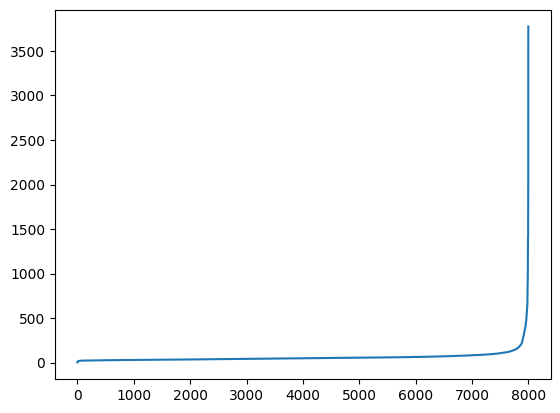

In [436]:
distances = np.mean(distances, axis=1)
distances = np.sort(distances)
plt.plot(distances)

Оптимальное значение epsilon находится в точке перегиба, как видно по графику, это примерно 100.

In [459]:
dbscan = DBSCAN(eps=100, min_samples=200).fit(three_sigmas_df)
print(np.unique(dbscan.labels_))

[-1  0  1]


В полученной кластеризации аномалии соответствуют классу 1, посмотрим, сколько их вышло.

In [463]:
len(dbscan.labels_[dbscan.labels_ == 1])

316

Удалим обнаруженные аномалии

In [468]:
three_sigmas_df['cluster'] = dbscan.labels_

In [469]:
three_sigmas_df = three_sigmas_df.loc[three_sigmas_df['cluster'] != 1]

In [470]:
three_sigmas_df

,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,MeanBUN,...,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinI,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight,cluster
0,27.0,0.0,-0.50,2.0,2.951625,105.159711,161.229856,228.553798,1.885847,10.500000,...,17.428571,96.558512,119.096129,37.357143,7.600771,1.017012,171.052632,10.300000,-1.000000,0
1,38.0,0.5,87.65,1.0,2.951625,105.159711,161.229856,228.553798,1.885847,18.333333,...,19.650854,96.833333,113.411765,36.939130,7.600771,1.017012,151.560976,11.266667,80.670588,0
2,22.0,0.0,-0.50,1.5,2.500000,116.000000,83.000000,199.500000,2.900000,4.666667,...,19.650854,95.000000,125.687500,37.800000,7.600771,1.017012,124.951220,4.700000,56.700000,0
4,44.0,0.0,-0.50,1.5,3.300000,105.159711,161.229856,228.553798,1.885847,35.000000,...,19.166667,96.558512,119.096129,36.880000,7.600771,1.017012,62.131579,4.300000,-1.000000,0
7,39.0,0.0,81.30,1.5,1.900000,47.000000,46.000000,82.000000,0.300000,64.600000,...,19.650854,96.400000,125.550000,37.005556,3.300000,1.017012,43.810811,20.000000,48.400000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,41.0,0.5,-0.50,1.5,3.600000,64.000000,53.000000,116.000000,0.500000,21.750000,...,19.650854,96.558512,119.096129,37.121429,7.600771,1.017012,170.405405,10.233333,47.500000,-1
7993,18.5,0.0,77.45,2.0,2.951625,105.159711,161.229856,228.553798,1.885847,6.666667,...,19.650854,96.558512,119.096129,37.438889,7.600771,1.017012,210.100000,8.233333,65.000000,0
7994,32.0,0.0,-0.50,2.0,2.951625,105.159711,161.229856,228.553798,1.885847,23.000000,...,19.650854,98.500000,143.638298,37.166667,7.600771,1.017012,142.777778,14.250000,81.189189,0
7995,39.0,0.5,90.15,1.0,2.951625,105.159711,161.229856,228.553798,1.885847,24.000000,...,19.650854,96.875000,129.271186,36.854348,7.600771,1.017012,129.487805,16.766667,88.184444,0


In [471]:
three_sigmas_df.drop('cluster', axis=1)

,Age,Gender,Height,ICUType,MeanAlbumin,MeanALP,MeanALT,MeanAST,MeanBilirubin,MeanBUN,...,MeanPlatelets,MeanRespRate,MeanSaO2,MeanSysABP,MeanTemp,MeanTroponinI,MeanTroponinT,MeanUrine,MeanWBC,MeanWeight
0,27.0,0.0,-0.50,2.0,2.951625,105.159711,161.229856,228.553798,1.885847,10.500000,...,203.000000,17.428571,96.558512,119.096129,37.357143,7.600771,1.017012,171.052632,10.300000,-1.000000
1,38.0,0.5,87.65,1.0,2.951625,105.159711,161.229856,228.553798,1.885847,18.333333,...,178.600000,19.650854,96.833333,113.411765,36.939130,7.600771,1.017012,151.560976,11.266667,80.670588
2,22.0,0.0,-0.50,1.5,2.500000,116.000000,83.000000,199.500000,2.900000,4.666667,...,89.666667,19.650854,95.000000,125.687500,37.800000,7.600771,1.017012,124.951220,4.700000,56.700000
4,44.0,0.0,-0.50,1.5,3.300000,105.159711,161.229856,228.553798,1.885847,35.000000,...,103.000000,19.166667,96.558512,119.096129,36.880000,7.600771,1.017012,62.131579,4.300000,-1.000000
7,39.0,0.0,81.30,1.5,1.900000,47.000000,46.000000,82.000000,0.300000,64.600000,...,96.333333,19.650854,96.400000,125.550000,37.005556,3.300000,1.017012,43.810811,20.000000,48.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,41.0,0.5,-0.50,1.5,3.600000,64.000000,53.000000,116.000000,0.500000,21.750000,...,173.333333,19.650854,96.558512,119.096129,37.121429,7.600771,1.017012,170.405405,10.233333,47.500000
7993,18.5,0.0,77.45,2.0,2.951625,105.159711,161.229856,228.553798,1.885847,6.666667,...,233.666667,19.650854,96.558512,119.096129,37.438889,7.600771,1.017012,210.100000,8.233333,65.000000
7994,32.0,0.0,-0.50,2.0,2.951625,105.159711,161.229856,228.553798,1.885847,23.000000,...,112.500000,19.650854,98.500000,143.638298,37.166667,7.600771,1.017012,142.777778,14.250000,81.189189
7995,39.0,0.5,90.15,1.0,2.951625,105.159711,161.229856,228.553798,1.885847,24.000000,...,118.250000,19.650854,96.875000,129.271186,36.854348,7.600771,1.017012,129.487805,16.766667,88.184444


Посмотрим на окончательное распределение данных.

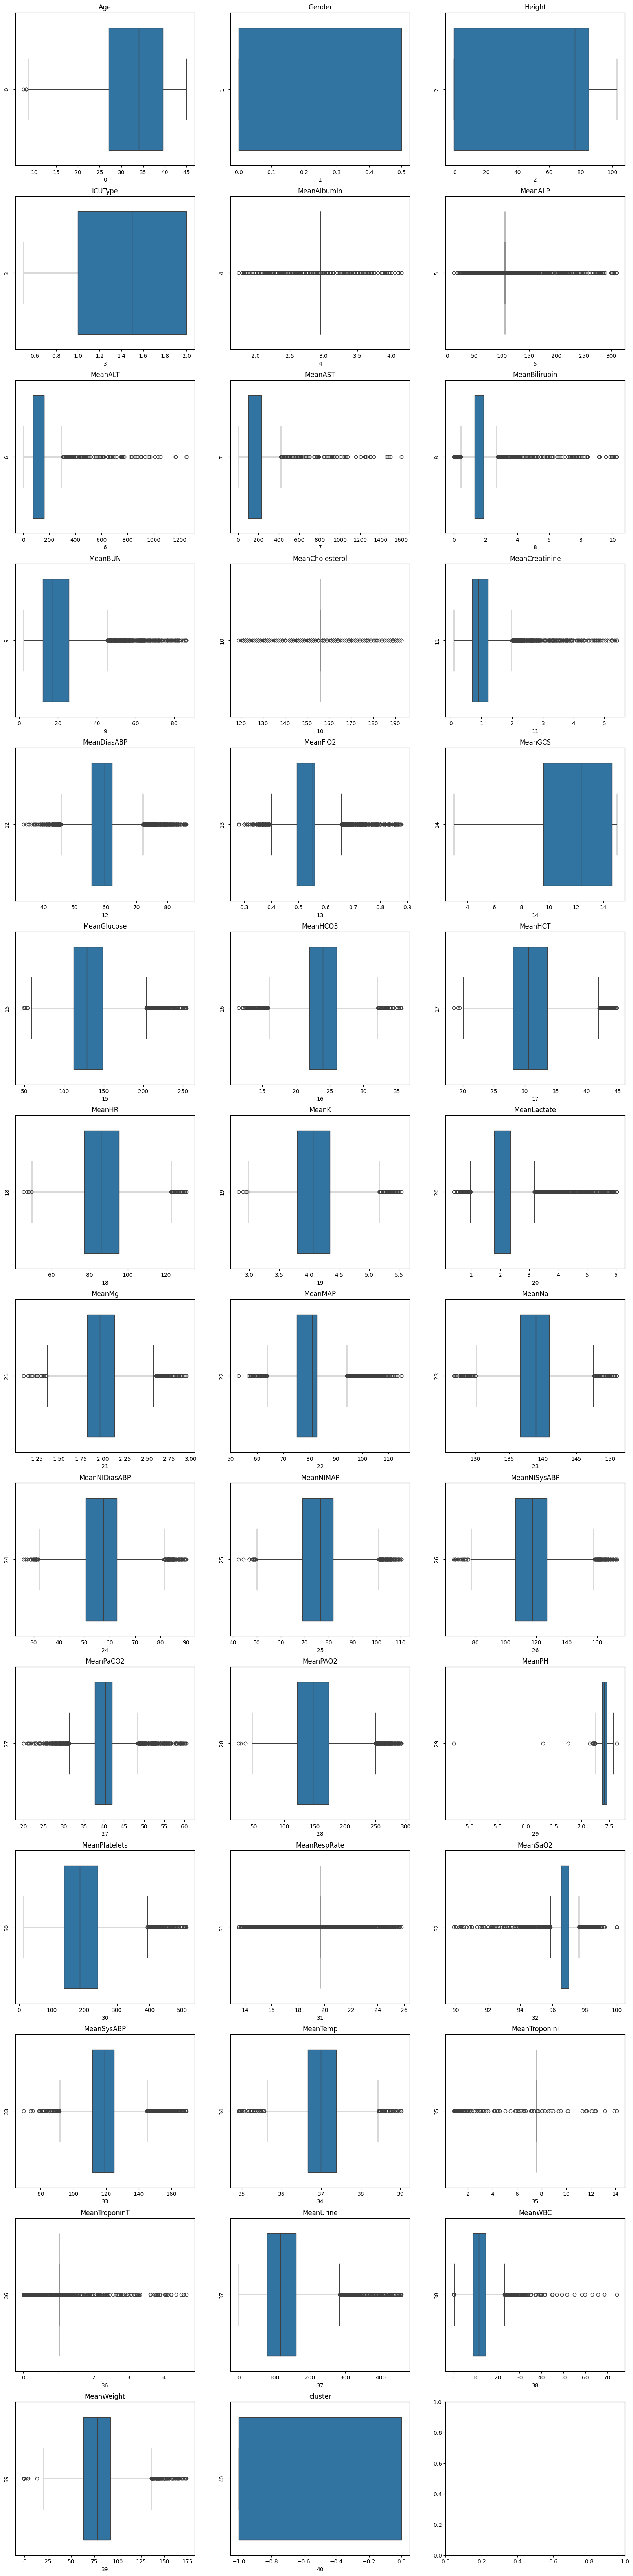

In [472]:
draw_subplots(three_sigmas_df, three_sigmas_df.columns)

In [473]:
three_sigmas_df.to_csv('2_4_data.csv', index=False)

черновик

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np

С
df.head()

,RecordID,Age,Gender,Height,ICUType,MeanWeight,MeanBUN,MeanCreatinine,MeanGCS,MeanGlucose,...,MeanpH,MeanALP,MeanALT,MeanAST,MeanAlbumin,MeanBilirubin,MeanLactate,MeanCholesterol,MeanTroponinI,MeanTroponinT
0,132539.0,54.0,0.0,-1.0,4.0,-1.000000,10.500000,0.750000,14.923077,160.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540.0,76.0,1.0,175.3,2.0,80.812121,18.333333,1.100000,13.333333,125.500000,...,7.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,132541.0,44.0,0.0,-1.0,3.0,56.700000,4.666667,0.333333,5.923077,134.333333,...,7.495,116.0,83.0,199.5,2.5,2.9,1.366667,NaN,NaN,NaN
3,132543.0,68.0,1.0,180.3,3.0,84.600000,17.666667,0.766667,14.944444,117.333333,...,NaN,105.0,12.0,15.0,4.4,0.2,NaN,NaN,NaN,NaN
4,132545.0,88.0,0.0,-1.0,3.0,-1.000000,35.000000,1.000000,15.000000,102.500000,...,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RecordID         8000 non-null   float64
 1   Age              8000 non-null   float64
 2   Gender           8000 non-null   float64
 3   Height           8000 non-null   float64
 4   ICUType          8000 non-null   float64
 5   MeanWeight       8000 non-null   float64
 6   MeanBUN          7880 non-null   float64
 7   MeanCreatinine   7880 non-null   float64
 8   MeanGCS          7871 non-null   float64
 9   MeanGlucose      7799 non-null   float64
 10  MeanHCO3         7863 non-null   float64
 11  MeanHCT          7876 non-null   float64
 12  MeanHR           7872 non-null   float64
 13  MeanK            7831 non-null   float64
 14  MeanMg           7813 non-null   float64
 15  MeanNIDiasABP    7000 non-null   float64
 16  MeanNIMAP        6996 non-null   float64
 17  MeanNISysABP  

In [3]:
def full_preprocess(df, useless_cols=['MeanTroponinI', 'MeanTroponinT', 'MeanMechVent']):
    # # Загрузка датасета
    # df = pd.read_csv(filename, encoding='utf-8', sep=',')
    # Удаление дубликатов
    df = df.drop_duplicates()
    # Удаление неинформативных столбцов
    df.drop(useless_cols, axis=1, inplace=True)
    # Удаление данных с большим количеством пропусков
    threshold = len(df) * 0.7
    df = df.dropna(thresh=threshold, axis=1)
    # Заполнение пропусков
    df = fill_missing_values(df, columns=df.columns, type_vals='float64')

    return df

In [4]:
def find_mean(df, columns=[], type_vals='float64'):
    means = []
    for col in columns:
        means.append(np.mean(df[col].dropna().astype(type_vals)))
    return means

In [5]:
def fill_missing_values(df, columns=[], type_vals='float64'):
    fill_values = find_mean(df, columns, type_vals)
    for col, fill_value in zip(columns, fill_values):
        df[col].fillna(fill_value, inplace=True)
    return df

In [6]:
df = full_preprocess(df)

In [7]:
# Объединение датасетов по столбцу RecordID
df_existing = pd.read_csv('Outcomes_для_С1.txt', encoding='utf-8', sep=',')

In [8]:
merged_df = pd.merge(df, df_existing, on='RecordID', how='inner')

In [9]:
merged_df

,RecordID,Age,Gender,Height,ICUType,MeanWeight,MeanBUN,MeanCreatinine,MeanGCS,MeanGlucose,...,MeanTemp,MeanUrine,MeanWBC,MeanDiasABP,MeanPaCO2,MeanPaO2,MeanSysABP,MeanpH,Survival,In-hospital_death
0,132539.0,54.0,0.0,-1.0,4.0,-1.000000,10.500000,0.750000,14.923077,160.000000,...,37.357143,171.052632,10.300000,59.615076,40.346132,147.327672,119.096063,7.452683,-1,0
1,132540.0,76.0,1.0,175.3,2.0,80.812121,18.333333,1.100000,13.333333,125.500000,...,36.939130,151.560976,11.266667,58.897059,38.857143,210.142857,113.411765,7.395000,-1,0
2,132541.0,44.0,0.0,-1.0,3.0,56.700000,4.666667,0.333333,5.923077,134.333333,...,37.800000,124.951220,4.700000,67.125000,35.500000,134.500000,125.687500,7.495000,-1,0
3,132543.0,68.0,1.0,180.3,3.0,84.600000,17.666667,0.766667,14.944444,117.333333,...,36.223077,545.833333,9.400000,59.615076,40.346132,147.327672,119.096063,7.452683,575,0
4,132545.0,88.0,0.0,-1.0,3.0,-1.000000,35.000000,1.000000,15.000000,102.500000,...,36.880000,62.131579,4.300000,59.615076,40.346132,147.327672,119.096063,7.452683,918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,152849.0,78.0,1.0,180.3,2.0,88.376923,24.000000,1.000000,12.545455,110.000000,...,36.854348,129.487805,16.766667,62.355932,40.312500,159.250000,129.271186,7.375625,752,0
7996,152851.0,90.0,1.0,177.8,3.0,87.096970,54.571429,2.157143,6.750000,141.714286,...,37.092857,20.333333,28.071429,45.375000,31.666667,77.333333,117.416667,7.276667,39,0
7997,152858.0,70.0,0.0,152.4,2.0,78.169231,29.666667,1.600000,14.722222,121.333333,...,36.600000,135.926829,14.333333,60.863636,32.000000,117.500000,120.272727,7.350000,334,0
7998,152862.0,49.0,0.0,-1.0,3.0,57.000000,14.000000,0.650000,15.000000,130.000000,...,36.409091,324.444444,15.100000,59.615076,46.000000,98.666667,119.096063,7.366667,-1,0


In [14]:
import os
import pandas as pd
import numpy as np

def process_patient_file(file_path):
    # Чтение данных из файла
    data = pd.read_csv(file_path)
    
    # Извлечение общих параметров
    general_params = data[data['Time'] == '00:00'].set_index('Parameter')['Value']
    
    # Функция для безопасного извлечения и преобразования значений
    def get_float_value(param):
        if param in general_params:
            values = general_params[param]
            if isinstance(values, pd.Series):
                # Если это серия, берем первое значение
                return float(values.iloc[0])
            else:
                return float(values)
        else:
            return np.nan
    
    record_id = get_float_value('RecordID')
    age = get_float_value('Age')
    gender = get_float_value('Gender')
    height = get_float_value('Height')
    icu_type = get_float_value('ICUType')
    weight = get_float_value('Weight')
    
    # Извлечение временных рядов
    time_series_data = data[data['Time'] != '00:00']
    
    # Формирование строки для итогового датасета
    result = {
        'RecordID': record_id,
        'Age': age,
        'Gender': gender,
        'Height': height,
        'ICUType': icu_type,
        'Weight': weight,
        'TimeSeries': time_series_data
    }
    
    return result

def create_dataset(folder_path):
    # Получение списка файлов в папке
    files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    
    # Обработка каждого файла и сбор данных
    dataset = []
    for file in files:
        file_path = os.path.join(folder_path, file)
        patient_data = process_patient_file(file_path)
        dataset.append(patient_data)
    
    # Создание DataFrame из собранных данных
    df = pd.DataFrame(dataset)
    
    return df

# Пример использования
folder_path = 'set/set'  # Путь к папке с файлами
df = create_dataset(folder_path)
df.head()

,RecordID,Age,Gender,Height,ICUType,Weight,TimeSeries
0,132539.0,54.0,0.0,-1.0,4.0,-1.0,Time Parameter Value 6 00:07 ...
1,132540.0,76.0,1.0,175.3,2.0,76.0,Time Parameter Value 6 00:42 ...
2,132541.0,44.0,0.0,-1.0,3.0,56.7,Time Parameter Value 6 00:02 ...
3,132543.0,68.0,1.0,180.3,3.0,84.6,Time Parameter Value 6 00:11 Al...
4,132545.0,88.0,0.0,-1.0,3.0,-1.0,Time Parameter Value 6 02:18 ...


In [15]:
merged_df = pd.merge(df, df_existing, on='RecordID', how='inner')

In [16]:
merged_df

,RecordID,Age,Gender,Height,ICUType,Weight,TimeSeries,Survival,In-hospital_death
0,132539.0,54.0,0.0,-1.0,4.0,-1.00,Time Parameter Value 6 00:07 ...,-1,0
1,132540.0,76.0,1.0,175.3,2.0,76.00,Time Parameter Value 6 00:42 ...,-1,0
2,132541.0,44.0,0.0,-1.0,3.0,56.70,Time Parameter Value 6 00:02 ...,-1,0
3,132543.0,68.0,1.0,180.3,3.0,84.60,Time Parameter Value 6 00:11 Al...,575,0
4,132545.0,88.0,0.0,-1.0,3.0,-1.00,Time Parameter Value 6 02:18 ...,918,0
...,...,...,...,...,...,...,...,...,...
7995,152849.0,78.0,1.0,180.3,2.0,83.18,Time Parameter Value 6 02:09 ...,752,0
7996,152851.0,90.0,1.0,177.8,3.0,87.00,Time Parameter Value 6 00:11 ...,39,0
7997,152858.0,70.0,0.0,152.4,2.0,74.00,Time Parameter Value 6 00:13 ...,334,0
7998,152862.0,49.0,0.0,-1.0,3.0,57.00,Time Parameter Value 6 00:10 U...,-1,0


In [21]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Masking
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Подготовка данных
def prepare_data(df):
    X = []
    y = []
    
    # Определяем фиксированный набор параметров
    fixed_parameters = ['MeanBUN', 'MeanCreatinine', 'MeanGCS', 'MeanGlucose', 'MeanTemp', 
                        'MeanUrine', 'MeanWBC', 'MeanDiasABP', 'MeanPaCO2', 'MeanPaO2', 
                        'MeanSysABP', 'MeanpH']  # Добавьте все необходимые параметры

    for _, row in df.iterrows():
        time_series = row['TimeSeries']
        
        # Удаляем дубликаты и агрегируем значения
        time_series_grouped = time_series.groupby(['Time', 'Parameter'])['Value'].mean().reset_index()
        
        # Преобразование временного ряда в DataFrame
        time_series_df = time_series_grouped.pivot(index='Time', columns='Parameter', values='Value').fillna(0)
        
        # Создаем массив фиксированной длины
        time_series_values = []
        for param in fixed_parameters:
            if param in time_series_df.columns:
                time_series_values.append(time_series_df[param].values)
            else:
                time_series_values.append(np.zeros(time_series_df.shape[0]))  # Заполняем нулями, если параметр отсутствует
        
        # Добавляем в X и y
        X.append(np.array(time_series_values).T)  # Транспонируем для правильной формы
        y.append(row['Survival'])
    
    # Паддинг последовательностей до одинаковой длины
    X_padded = pad_sequences(X, dtype='float32', padding='post', value=0.0)
    
    return np.array(X_padded), np.array(y)

# Пример использования
X, y = prepare_data(merged_df)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели LSTM
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Предсказание и оценка модели
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R² score: {r2:.4f}')

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 153181.5781 - val_loss: 145758.5312
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 158841.9219 - val_loss: 145721.9688
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 152415.9531 - val_loss: 145685.4844
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 143031.7031 - val_loss: 145649.1406
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 131097.6562 - val_loss: 145613.2031
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 146354.1562 - val_loss: 145576.2656
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 139634.7188 - val_loss: 145539.5312
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 133739.5938 - val_loss: 145502.8281
Epoch 9/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 156134.6250 - val_loss: 145466.5938
Epoch 10/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 151419.2500 - val_loss: 145430.6719
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s

In [22]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LSTM, Bidirectional, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

X, y = prepare_data(merged_df)

# Стандартизация данных
scaler = StandardScaler()
X_reshaped = X.reshape(X.shape[0], -1)  # Преобразуем для стандартизации
X_scaled = scaler.fit_transform(X_reshaped)
X_scaled = X_scaled.reshape(X.shape)  # Возвращаем форму

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Определение модели
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))
x = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Attention Layer
attention = Attention()([x, x])
x = BatchNormalization()(attention)
x = Dropout(0.5)(x)

x = Bidirectional(LSTM(32, return_sequences=False, kernel_regularizer=l2(0.01)))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer for regression
output_layer = Dense(1, activation='linear')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Коллбэки
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Обучение модели
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])

# Оценка модели
y_pred = model.predict(X_test)

# Вычисление R²
r2 = r2_score(y_test, y_pred)
print(f'R² для модели: {r2}')

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - loss: 142823.4844 - mae: 126.6586 - val_loss: 144656.9219 - val_mae: 130.2245 - learning_rate: 0.0010
Epoch 2/100
 84/160 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 188836.4531 - mae: 155.8715

KeyboardInterrupt: 

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Разделение данных на признаки и целевую переменную
X = merged_df.drop(columns=['Survival', 'In-hospital_death', 'RecordID'], axis=1)
y = merged_df['Survival']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание пайплайна с масштабированием и линейной регрессией
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('model', LinearRegression())   # Модель линейной регрессии
])

# Определение параметров для GridSearchCV
param_grid = {'model__fit_intercept': [True, False]}  # Убираем normalize

# Поиск оптимальных параметров
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_

# Оценка модели
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)

print(f'Линейная регрессия MSE: {mse}')
print(f'R² для линейной регрессии: {r2_lin}')

Линейная регрессия MSE: 132313.39301131855
R² для линейной регрессии: 0.0432368232573489


In [18]:
from catboost import CatBoostRegressor

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from catboost import CatBoostRegressor

# Разделение данных на признаки и целевую переменную
X = merged_df.drop(columns=['Survival', 'In-hospital_death', 'RecordID'], axis=1)
y = merged_df['Survival'].astype(int)  # Убедитесь, что целевая переменная целочисленная

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Затем стандартизируем данные
standardizer = StandardScaler()
X_train_standardized = standardizer.fit_transform(X_train)
X_test_standardized = standardizer.transform(X_test)

# Определение модели CatBoostRegressor
catboost_model = CatBoostRegressor(silent=True)

# Создание пайплайна
pipeline = Pipeline([
    ('model', catboost_model)  # Модель CatBoost
])

# Параметры для GridSearchCV
param_grid = {
    'model__depth': [4, 6, 8],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__iterations': [100, 200]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_standardized, y_train)  # Используем стандартизированные данные

# Предсказание и оценка
y_pred_cat = grid_search.predict(X_test_standardized)
y_pred_cat_rounded = y_pred_cat.round().astype(int)  # Округление предсказаний до целых чисел

# Оценка R²
r2_cat = r2_score(y_test, y_pred_cat_rounded)
print(f'R² для CatBoost: {r2_cat}')

R² для CatBoost: 0.023187192226979847


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Разделение данных на признаки и целевую переменную
X = merged_df.drop(columns=['Survival', 'In-hospital_death', 'RecordID'], axis=1)
y = merged_df['Survival']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Определение модели CatBoostRegressor
catboost_model = CatBoostRegressor(silent=True, early_stopping_rounds=10)

# Создание пайплайна
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
    ('model', catboost_model)
])

# Параметры для RandomizedSearchCV
param_distributions = {
    'model__depth': [4, 6, 8, 10],
    'model__learning_rate': np.logspace(-3, 0, 10),
    'model__iterations': [100, 200, 300],
    'model__l2_leaf_reg': [1, 3, 5, 7, 9],
    'model__bagging_temperature': [0, 0.5, 1],
    'model__border_count': [32, 64, 128]
}

# RandomizedSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=50, cv=cv, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

# Предсказание и оценка
y_pred_cat = random_search.predict(X_test)
r2_cat = r2_score(y_test, y_pred_cat)
print(f'R² для CatBoost: {r2_cat}')

KeyboardInterrupt: 

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LSTM, Bidirectional, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Разделение данных на признаки и целевую переменную
X = merged_df.drop(columns=['Survival', 'In-hospital_death', 'RecordID'], axis=1)
y = merged_df['Survival']

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Преобразование данных для LSTM
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Определение модели
input_layer = Input(shape=(X_train.shape[1], 1))
x = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Attention Layer
attention = Attention()([x, x])
x = BatchNormalization()(attention)
x = Dropout(0.5)(x)

x = Bidirectional(LSTM(32, return_sequences=False, kernel_regularizer=l2(0.01)))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer for regression
output_layer = Dense(1, activation='linear')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Коллбэки
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Обучение модели
model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])

# Оценка модели
y_pred = model.predict(X_test)

# Вычисление R²
r2 = r2_score(y_test, y_pred)
print(f'R² для модели: {r2}')

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 169712.1875 - mae: 144.5138 - val_loss: 145346.2812 - val_mae: 129.3700 - learning_rate: 0.0010
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 142468.1406 - mae: 128.4212 - val_loss: 145047.1875 - val_mae: 130.4495 - learning_rate: 0.0010
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 148847.3906 - mae: 136.2672 - val_loss: 143898.3750 - val_mae: 132.8047 - learning_rate: 0.0010
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 150185.8281 - mae: 139.3965 - val_loss: 141404.7188 - val_mae: 136.1741 - learning_rate: 0.0010
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 152634.0625 - mae: 143.8751 - val_loss: 136989.7188 - val_mae: 143.3248 - learning_rate: 0.0010
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 128910.1250 - mae: 135.1403 - val_loss: 134585.8906 - val_mae: 150.9218 - learning_rate: 0.0010
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/ste

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки и целевую переменную
X = merged_df.drop(columns=['Survival', 'In-hospital_death', 'RecordID'], axis=1)
y = merged_df['Survival']

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Определение модели RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Параметры для GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Лучшая модель
best_rf_model = grid_search.best_estimator_

# Предсказание и оценка
y_pred = best_rf_model.predict(X_test)

# Вычисление R²
r2 = r2_score(y_test, y_pred)
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'R² для Random Forest: {r2}')

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Лучшие параметры: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
R² для Random Forest: 0.022868857443261392


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = merged_df.drop(columns=['In-hospital_death', 'RecordID'], axis=1)
y = merged_df['In-hospital_death']

merged_df = scaler.fit_transform(merged_df)

# Выбор лучших признаков
selector = SelectKBest(f_classif, k=10)  # Выберите оптимальное значение k
X_selected = selector.fit_transform(X, y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Обучение модели CatBoost
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', verbose=100)
model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)

# Оценка качества модели
y_pred = model.predict(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
print(f'Линейная регрессия MSE: {mse}')
print(f'R² для линейной регрессии: {r2_lin}')

In [58]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

# Определение модели SVR
svr_model = SVR()

# Параметры для GridSearchCV
param_grid_svr = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto'],
    'svr__epsilon': [0.1, 0.2, 0.5]
}

# Создание пайплайна для стандартизации и модели
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация данных
    ('svr', svr_model)              # Модель SVR
])

# GridSearchCV
grid_search_svr = GridSearchCV(estimator=pipeline, param_grid=param_grid_svr, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search_svr.fit(X_train, y_train)

# Лучшая модель
best_svr_model = grid_search_svr.best_estimator_

# Предсказание и оценка
y_pred_svr = best_svr_model.predict(X_test)

# Вычисление R²
r2_svr = r2_score(y_test, y_pred_svr)
print(f'Лучшие параметры для SVR: {grid_search_svr.best_params_}')
print(f'R² для SVR: {r2_svr}')

Fitting 3 folds for each of 96 candidates, totalling 288 fits


KeyboardInterrupt: 

In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Предполагается, что merged_df уже загружен и содержит данные

# Разделение данных на признаки и целевую переменную
X = merged_df.drop(columns=['Survival', 'In-hospital_death', 'RecordID'], axis=1)
y = merged_df['In-hospital_death']

# Разделение на обучающую и тестовую выборки с стратификацией
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Балансировка классов с использованием SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 1. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],  # Количество соседей, используемых для классификации
    'weights': ['uniform', 'distance'],  # Метод взвешивания: равные веса для всех соседей или взвешивание по расстоянию
    'metric': ['euclidean', 'manhattan']  # Метрика расстояния: евклидова или манхэттенская
}
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train_balanced, y_train_balanced)

# Предсказание и вывод classification report для KNN
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test_scaled)
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1376
           1       0.26      0.49      0.34       224

    accuracy                           0.73      1600
   macro avg       0.58      0.63      0.59      1600
weighted avg       0.81      0.73      0.76      1600



In [110]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# 2. Logistic Regression
log_reg_model = LogisticRegression(solver='liblinear')
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Регуляризационный параметр: меньшее значение означает более сильную регуляризацию
    'penalty': ['l1', 'l2'],  # Тип регуляризации: L1 (Lasso) или L2 (Ridge)
    'max_iter': [100, 200, 300]  # Максимальное количество итераций для сходимости алгоритма
}
grid_search_log_reg = GridSearchCV(estimator=log_reg_model, param_grid=param_grid_log_reg, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_log_reg.fit(X_train_balanced, y_train_balanced)

# Предсказание и вывод classification report для Logistic Regression
y_pred_log_reg = grid_search_log_reg.best_estimator_.predict(X_test_scaled)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# 3. Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Количество деревьев в лесу
    'max_features': ['auto', 'sqrt', 'log2'],  # Количество признаков, используемых для поиска наилучшего разбиения
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина дерева: ограничивает рост дерева
    'min_samples_split': [2, 5, 10],  # Минимальное количество образцов, необходимых для разбиения узла
    'min_samples_leaf': [1, 2, 4]  # Минимальное количество образцов, необходимых для листового узла
}
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Предсказание и вывод classification report для Random Forest
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_scaled)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1376
           1       0.29      0.75      0.42       224

    accuracy                           0.71      1600
   macro avg       0.62      0.73      0.62      1600
weighted avg       0.85      0.71      0.76      1600

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1376
           1       0.40      0.43      0.41       224

    accuracy                           0.83      1600
   macro avg       0.65      0.66      0.66      1600
weighted avg       0.84      0.83      0.83      1600



In [111]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Инициализация модели CatBoost
catboost_model = CatBoostClassifier(silent=True)  # silent=True отключает вывод информации о процессе обучения

# Определение сетки гиперпараметров для поиска
param_grid_catboost = {
    'depth': [4, 6, 8],  # Глубина дерева
    'learning_rate': [0.01],  # Скорость обучения
    'iterations': [1300],  # Количество итераций
    'l2_leaf_reg': [3, 5]  # Регуляризация L2
}

# Настройка GridSearchCV
grid_search_catboost = GridSearchCV(estimator=catboost_model, param_grid=param_grid_catboost, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Обучение модели с использованием GridSearchCV
grid_search_catboost.fit(X_train_balanced, y_train_balanced)

# Предсказание и вывод classification report для CatBoost
y_pred_catboost = grid_search_catboost.best_estimator_.predict(X_test_scaled)
print("Classification Report for CatBoost:")
print(classification_report(y_test, y_pred_catboost))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Classification Report for CatBoost:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1376
           1       0.41      0.44      0.43       224

    accuracy                           0.83      1600
   macro avg       0.66      0.67      0.66      1600
weighted avg       0.84      0.83      0.84      1600



In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Инициализация FastAPI
app = FastAPI()

# Определение модели данных для входных данных
class InputData(BaseModel):
    feature1: float
    feature2: float
    # Добавьте все необходимые признаки

# Загружаем данные и обучаем модель (это можно сделать заранее и загрузить модель из файла)
# Здесь мы просто повторяем код из вашего файла для примера
# Предполагается, что merged_df уже загружен и содержит данные
# merged_df = pd.read_csv('your_data.csv')  # Загрузите ваши данные

# Пример данных
# X = merged_df.drop(columns=['Survival', 'In-hospital_death', 'RecordID'], axis=1)
# y = merged_df['Survival']

# Разделение на обучающую и тестовую выборки
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание пайплайна с масштабированием и линейной регрессией
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Масштабирование данных
    ('model', LinearRegression())   # Модель линейной регрессии
])

# Определение параметров для GridSearchCV
param_grid = {'model__fit_intercept': [True, False]}  # Убираем normalize

# Поиск оптимальных параметров
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# Лучшая модель
# best_model = grid_search.best_estimator_

# Для примера, создадим фиктивную модель
best_model = pipeline  # Замените на вашу обученную модель

# Эндпоинт для предсказания
@app.post("/predict")
def predict(data: InputData):
    # Преобразование входных данных в DataFrame
    input_df = pd.DataFrame([data.dict()])
    
    # Предсказание
    prediction = best_model.predict(input_df)
    
    # Возврат результата
    return {"prediction": prediction[0]}

# Запуск приложения: uvicorn main:app --reload

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LSTM, Bidirectional, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Инициализация FastAPI
app = FastAPI()

# Определение модели данных для входных данных
class InputData(BaseModel):
    features: list

# Загрузка и подготовка данных
# Предполагается, что merged_df уже загружен и содержит данные
# merged_df = pd.read_csv('your_data.csv')  # Загрузите ваши данные

# Пример данных
# X = merged_df.drop(columns=['Survival', 'In-hospital_death', 'RecordID'], axis=1)
# y = merged_df['Survival']

# Стандартизация данных
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Преобразование данных для LSTM
# X_train = np.expand_dims(X_train, axis=-1)
# X_test = np.expand_dims(X_test, axis=-1)

# Определение модели
input_layer = Input(shape=(None, 1))
x = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))(input_layer)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Attention Layer
attention = Attention()([x, x])
x = BatchNormalization()(attention)
x = Dropout(0.5)(x)

x = Bidirectional(LSTM(32, return_sequences=False, kernel_regularizer=l2(0.01)))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer for regression
output_layer = Dense(1, activation='linear')(x)

model = Model(inputs=input_layer, outputs=output_layer)

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Коллбэки
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Обучение модели
# model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])

# Сохранение модели
# model.save('lstm_model.h5')

# Загрузка обученной модели
# model = load_model('lstm_model.h5')

# Эндпоинт для предсказания с использованием LSTM модели
@app.post("/predict_lstm")
def predict_lstm(data: InputData):
    # Преобразование входных данных в numpy массив и масштабирование
    input_data = np.array(data.features).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)
    input_data_scaled = np.expand_dims(input_data_scaled, axis=-1)
    
    # Предсказание
    prediction = model.predict(input_data_scaled)
    
    # Возврат результата
    return {"prediction": prediction[0][0]}

# Запуск приложения: uvicorn main:app --reload

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Инициализация FastAPI
app = FastAPI()

# Определение модели данных для входных данных
class InputData(BaseModel):
    features: list

# Предполагается, что merged_df уже загружен и содержит данные
# merged_df = pd.read_csv('your_data.csv')  # Загрузите ваши данные

# Пример данных
# X = merged_df.drop(columns=['Survival', 'In-hospital_death', 'RecordID'], axis=1)
# y = merged_df['In-hospital_death']

# Разделение на обучающую и тестовую выборки с стратификацией
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Стандартизация данных
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Балансировка классов с использованием SMOTE
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Инициализация и обучение модели CatBoost
catboost_model = CatBoostClassifier(silent=True, depth=6, learning_rate=0.01, iterations=1300, l2_leaf_reg=3)
# catboost_model.fit(X_train_balanced, y_train_balanced)

# Сохранение модели
# catboost_model.save_model('catboost_model.cbm')

# Загрузка обученной модели
catboost_model.load_model('catboost_model.cbm')

# Эндпоинт для предсказания с использованием CatBoost модели
@app.post("/predict_catboost")
def predict_catboost(data: InputData):
    # Преобразование входных данных в numpy массив и масштабирование
    input_data = np.array(data.features).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)
    
    # Предсказание
    prediction = catboost_model.predict(input_data_scaled)
    
    # Возврат результата
    return {"prediction": int(prediction[0])}

# Запуск приложения: uvicorn main:app --reload

In [ ]:
!pip install fastapi uvicorn catboost scikit-learn pandas numpy

In [ ]:
uvicorn main:app --reload

In [ ]:
!uvicorn main:app --reload